In [ ]:
from google.colab import files

# Paso 1: Subir los archivos desde la computadora
uploaded = files.upload()

Saving winequality.names to winequality.names
Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None
       fixed acidity  volatile acidity  citric acid  residual s

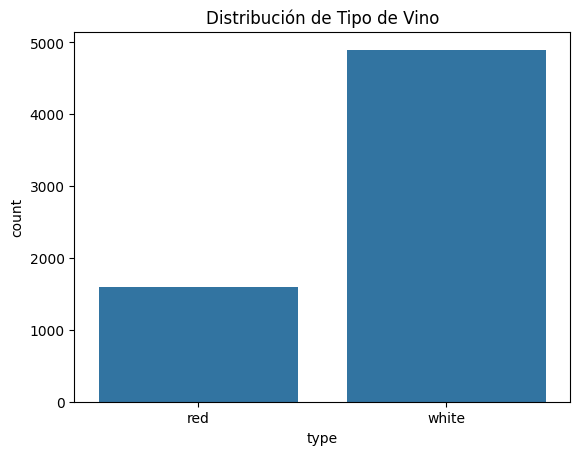

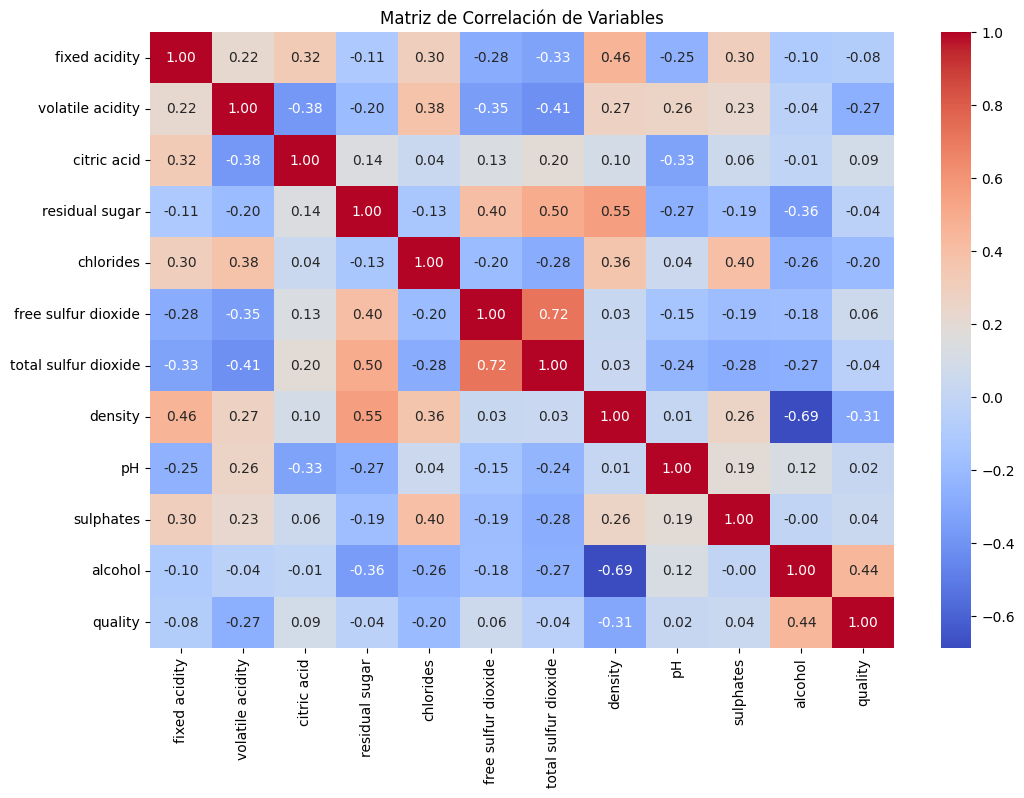

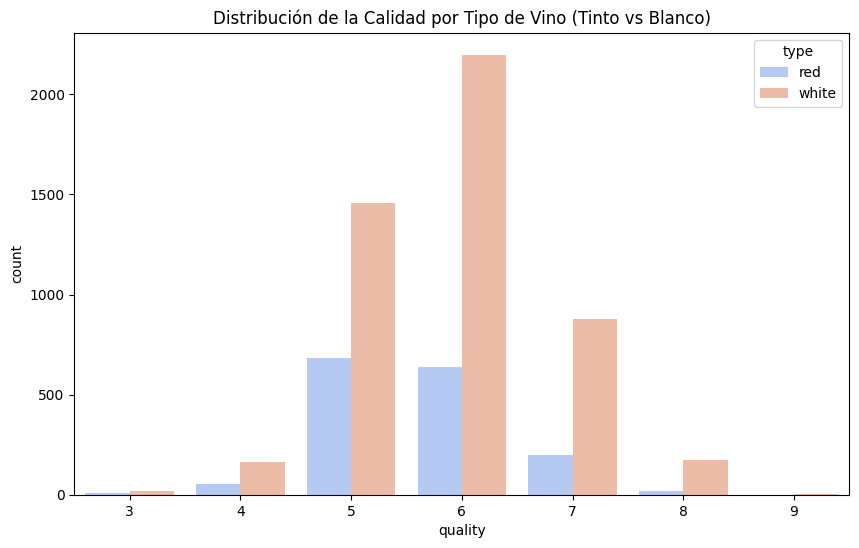

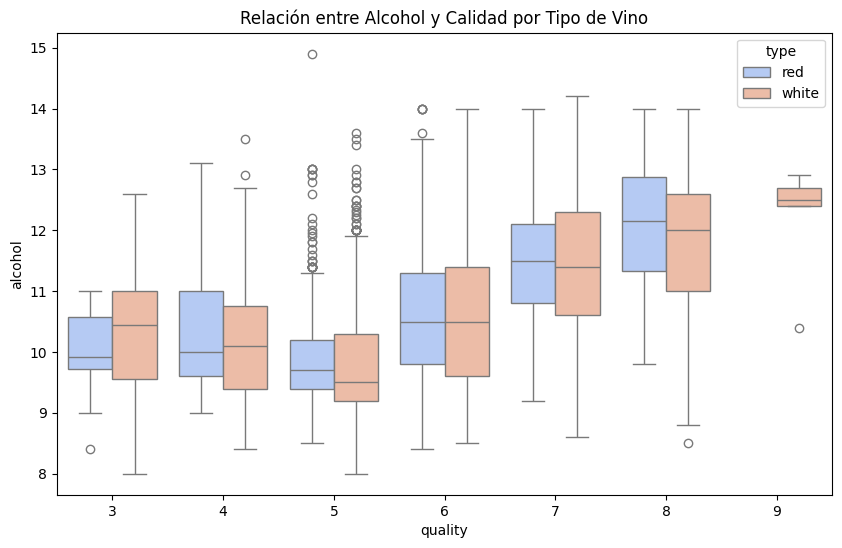

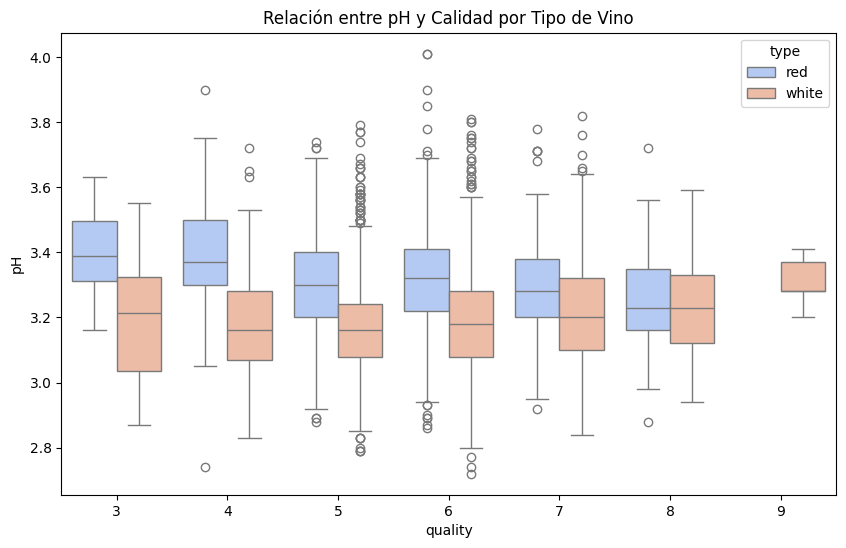

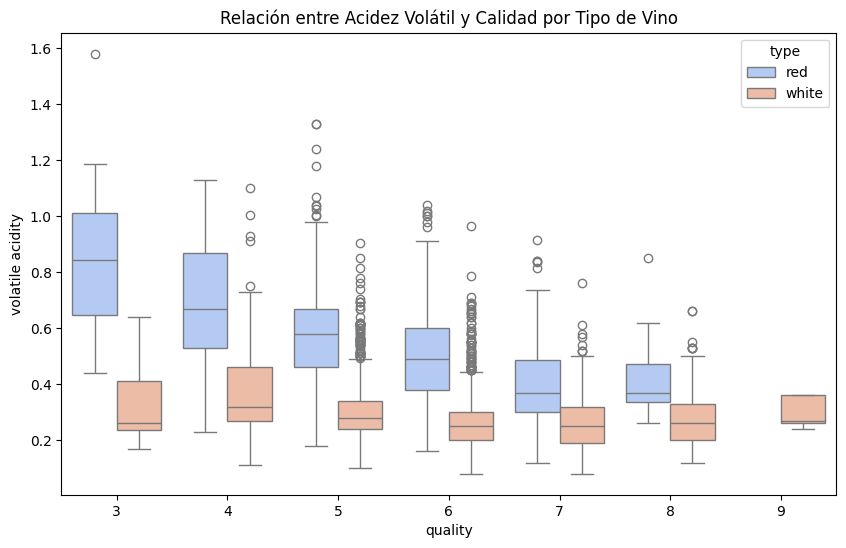

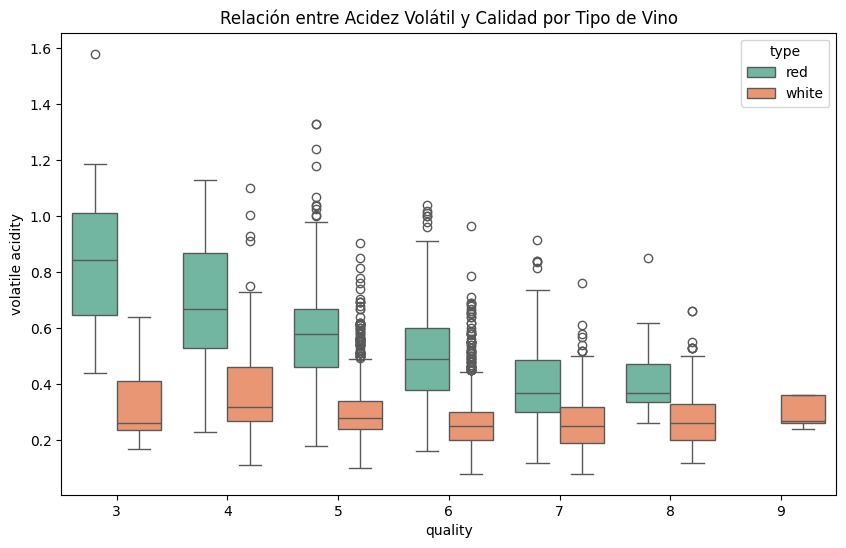

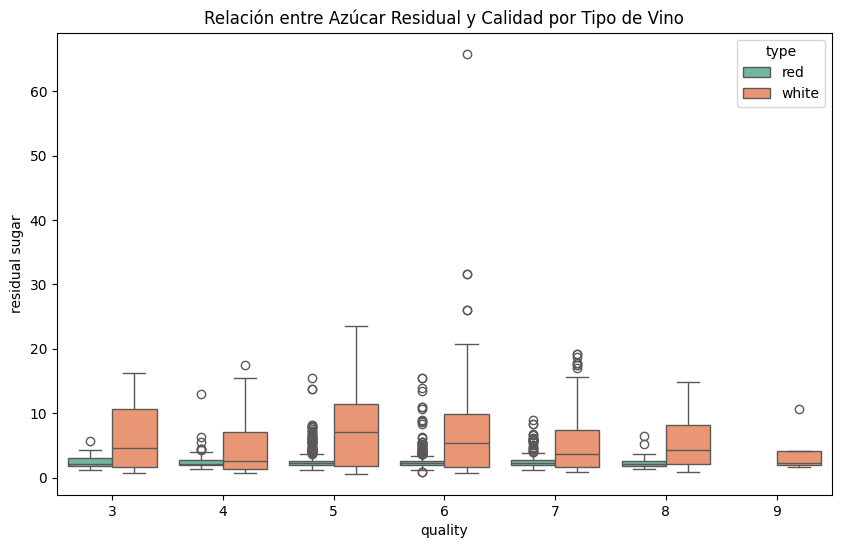

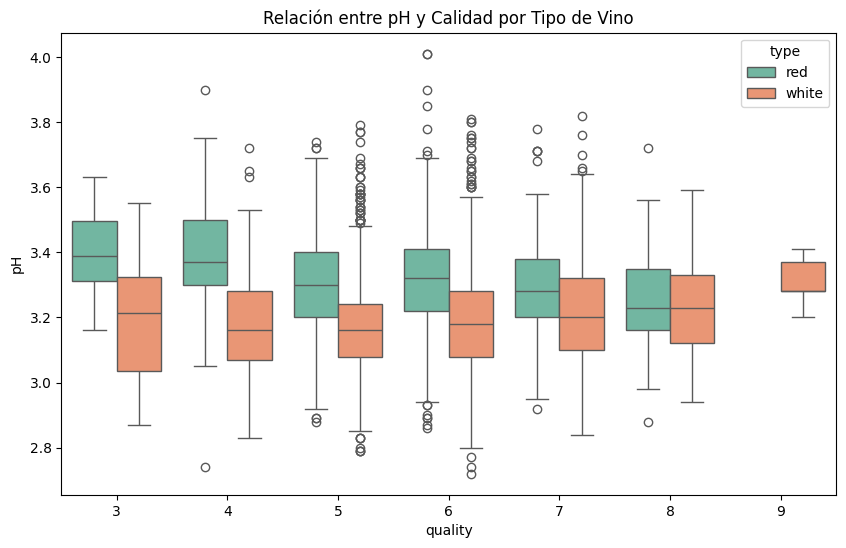

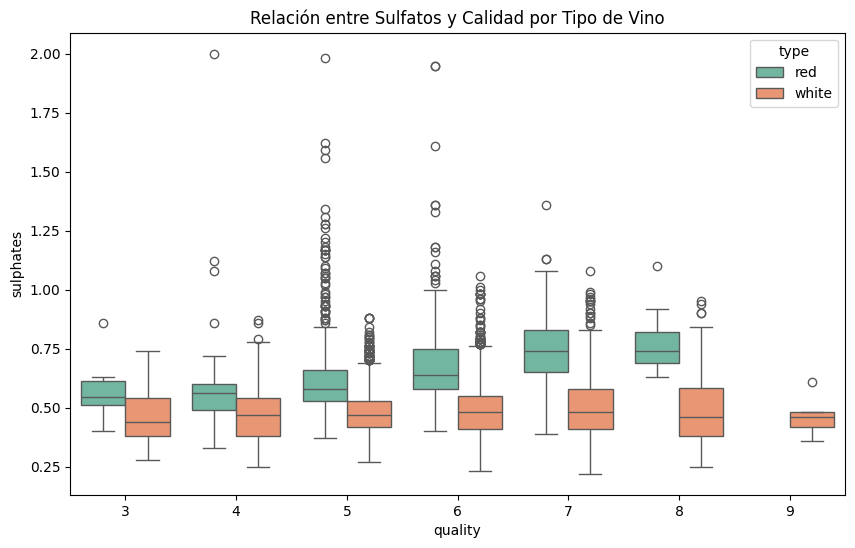

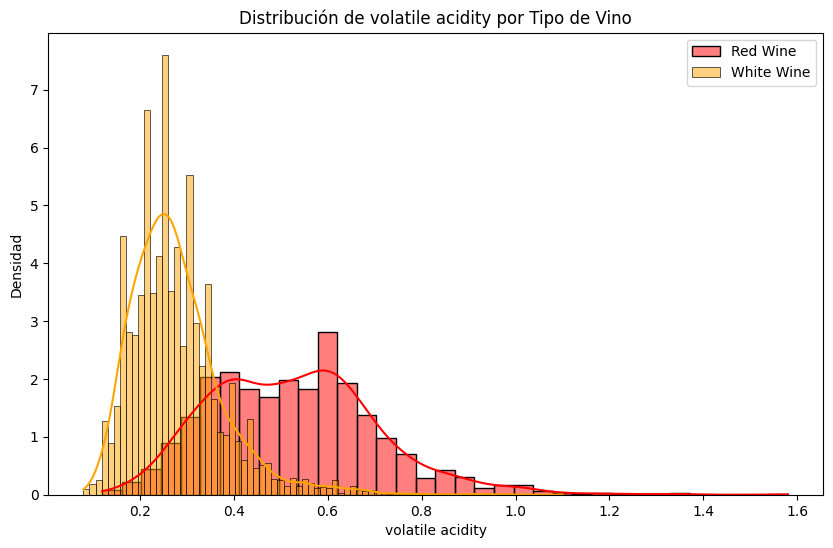

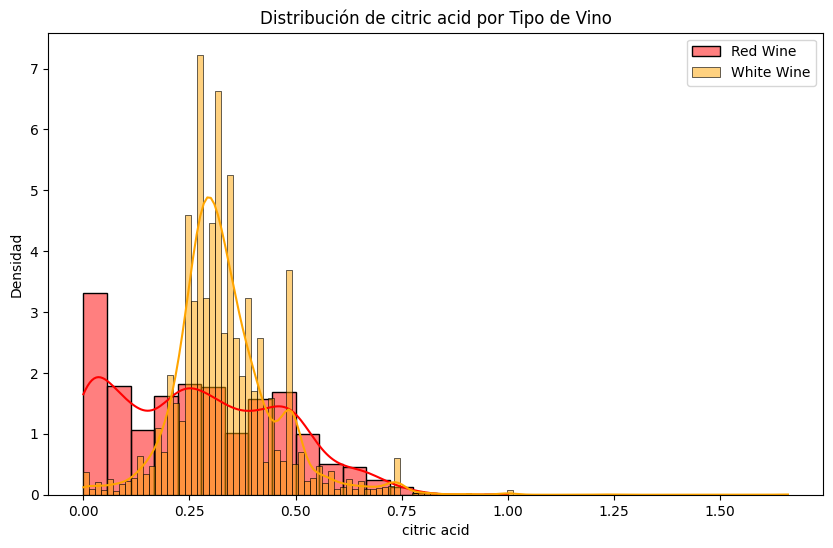

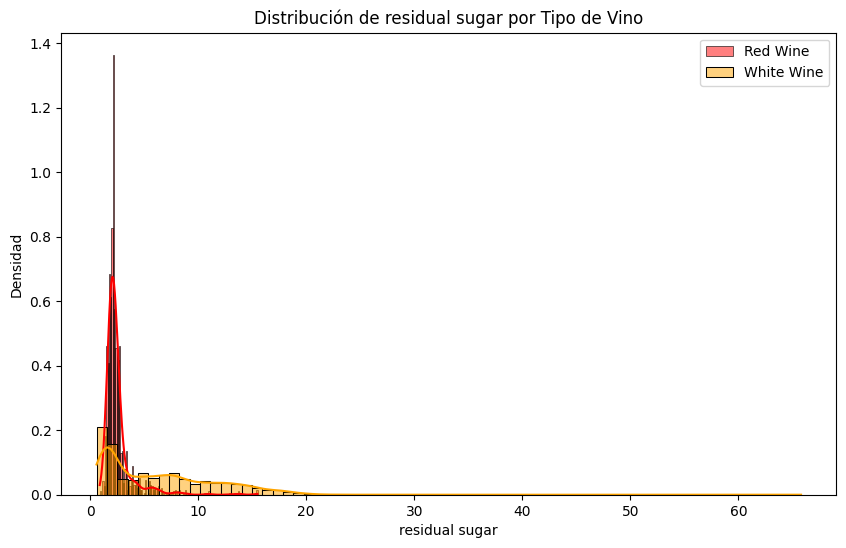

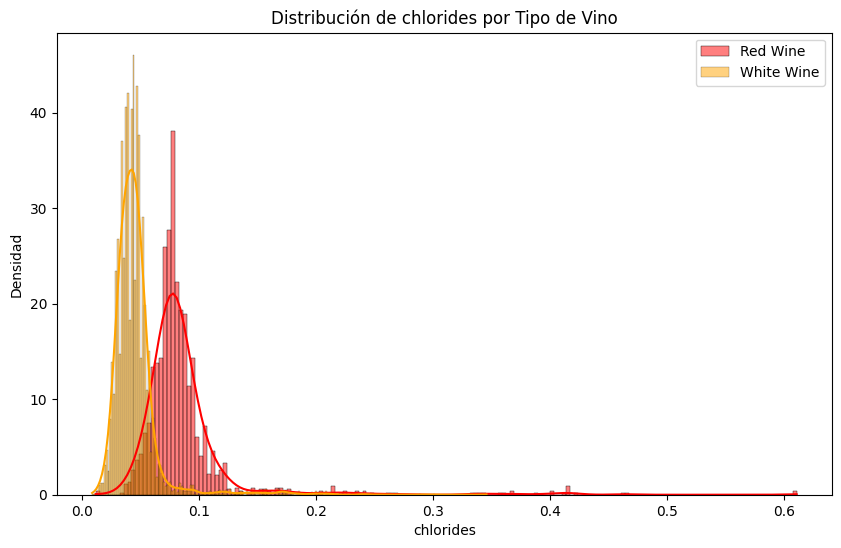

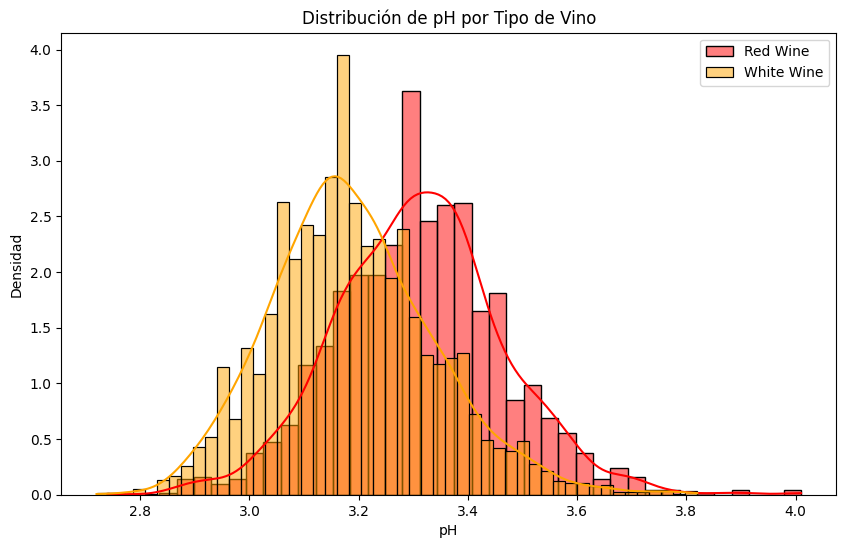

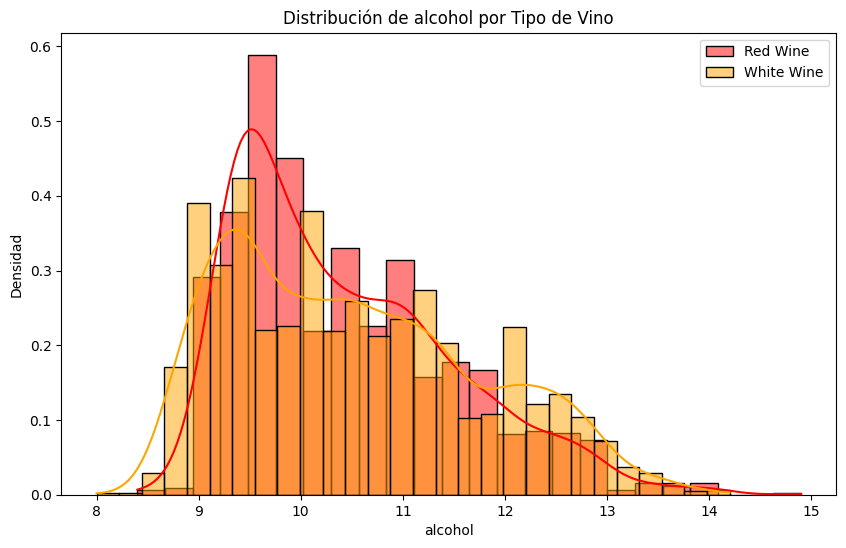

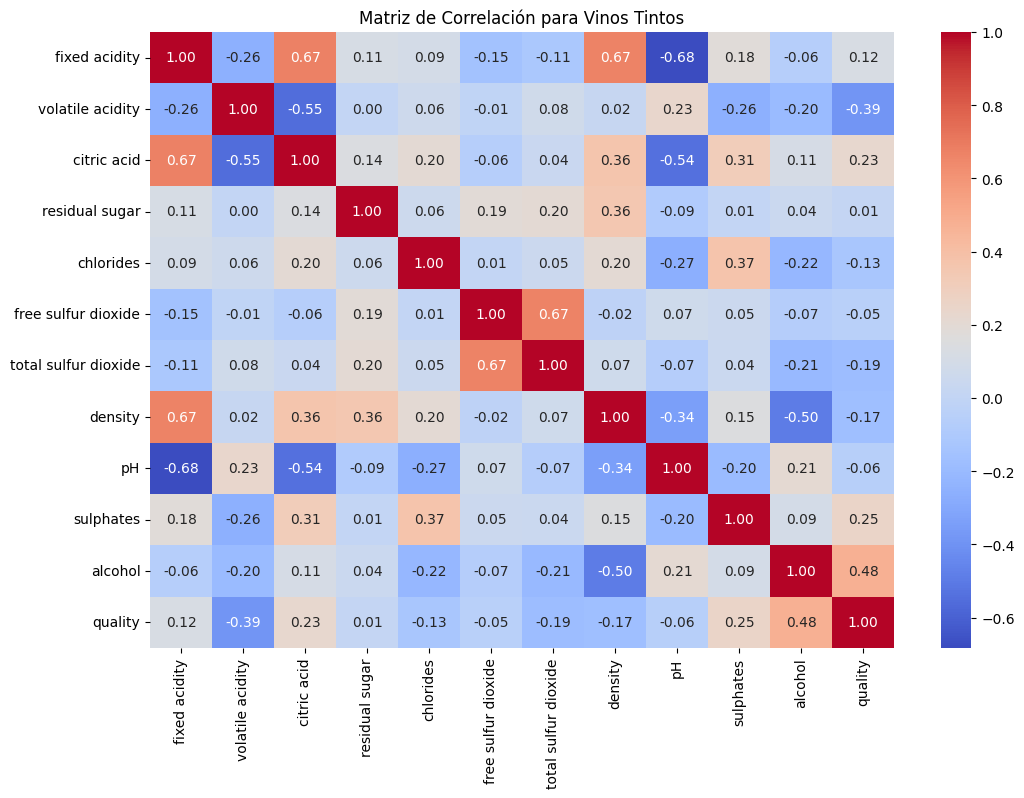

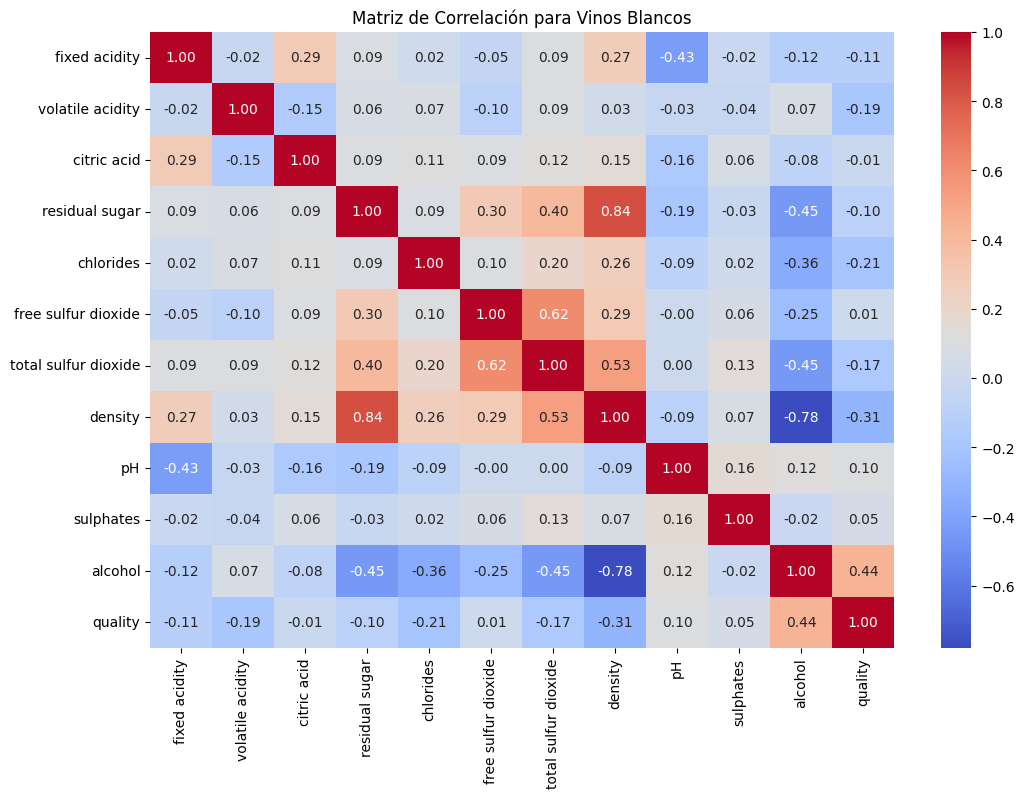

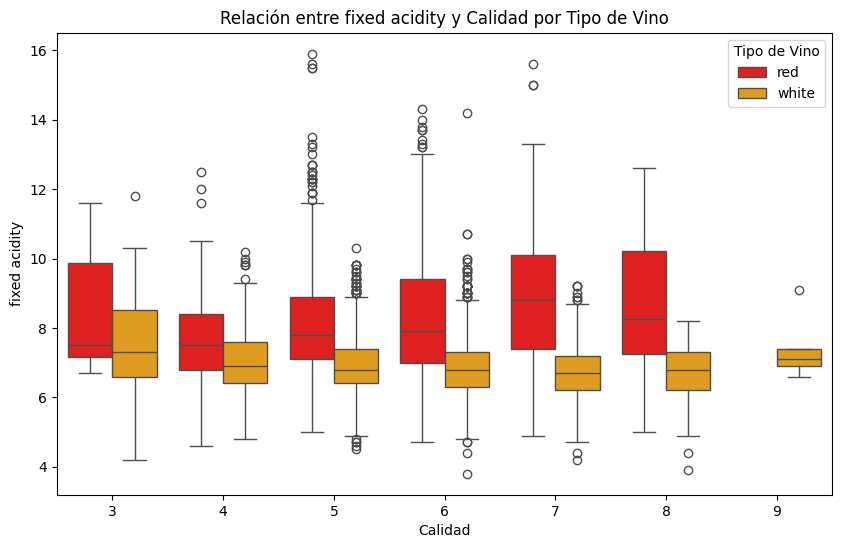

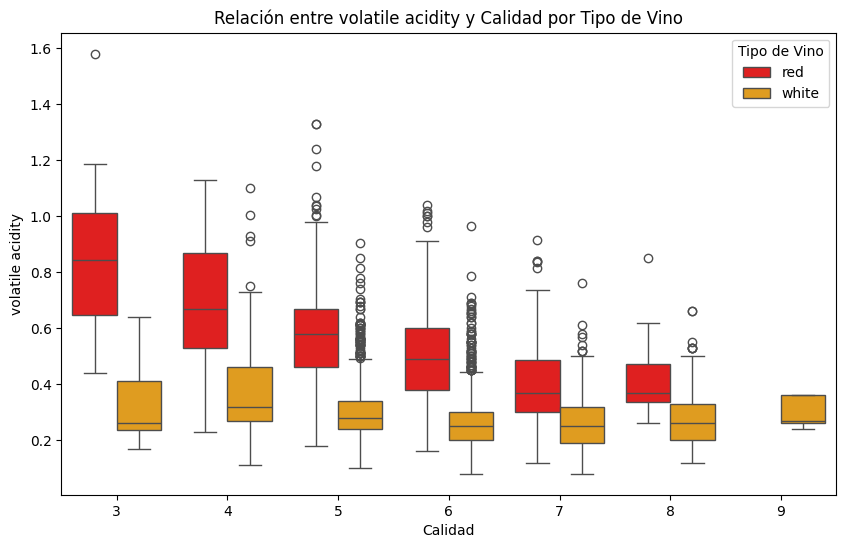

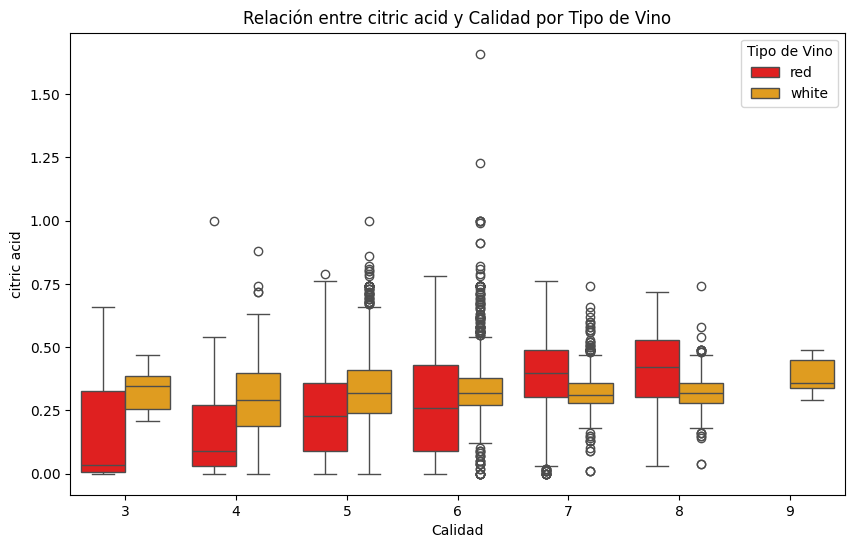

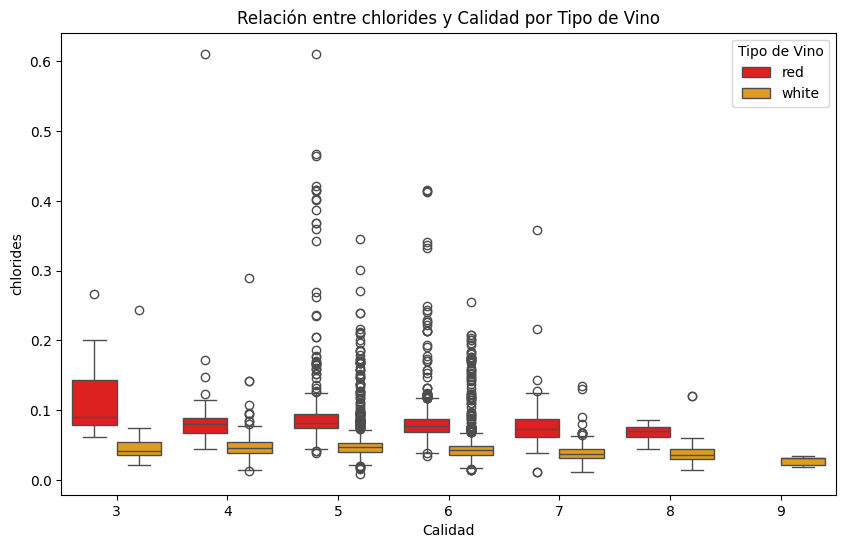

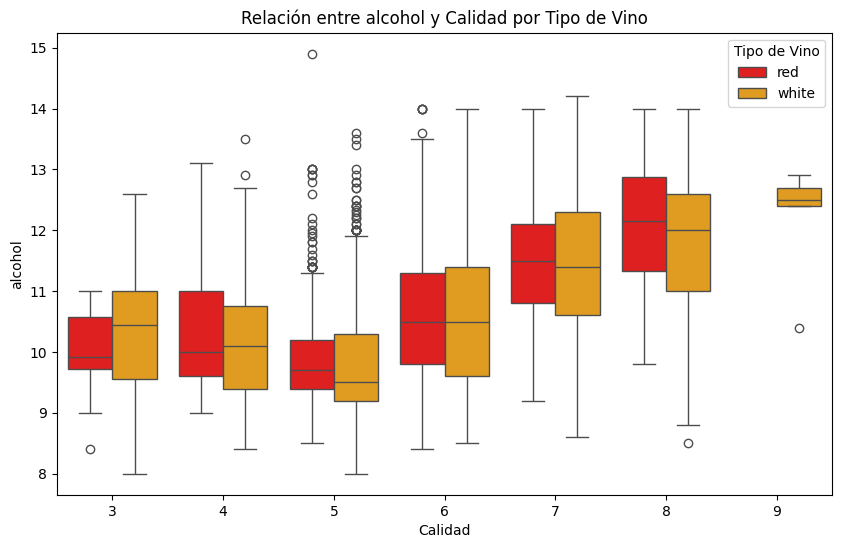

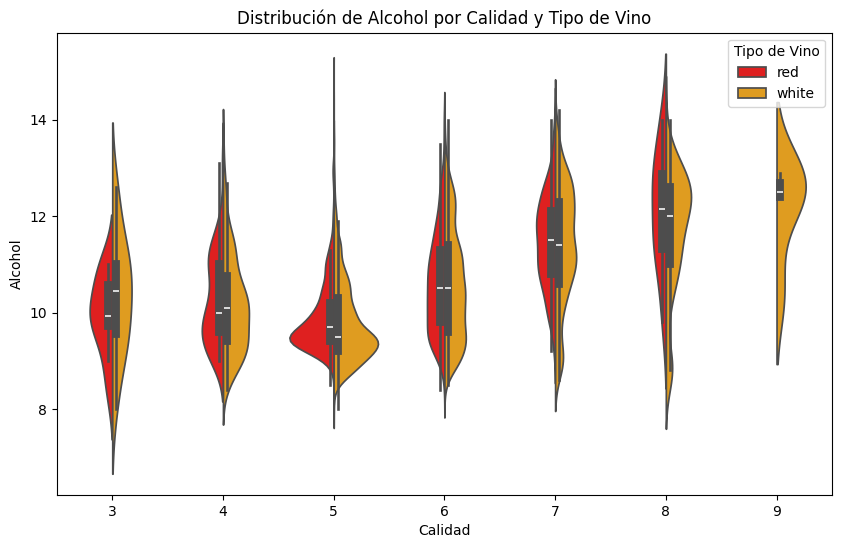

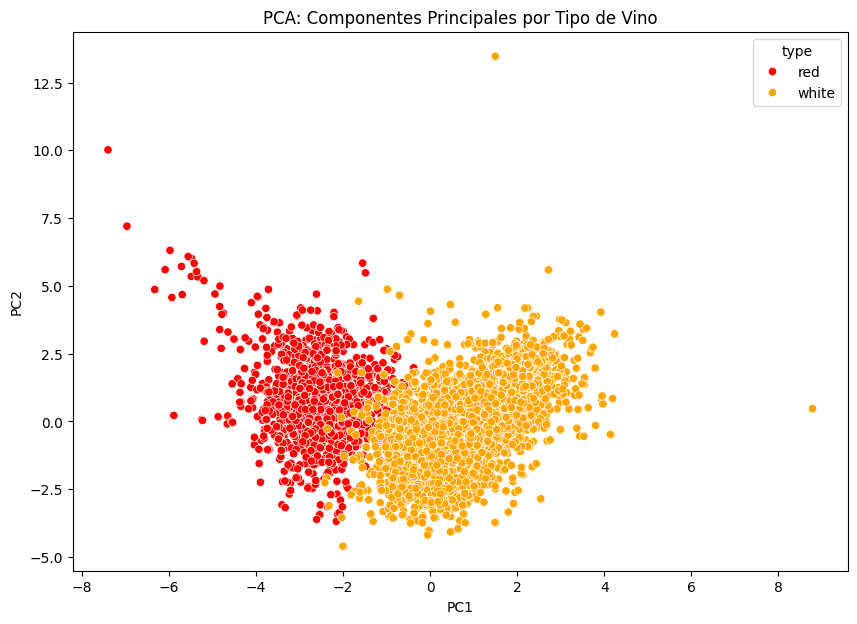

Varianza explicada por el primer componente: 0.28
Varianza explicada por el segundo componente: 0.23
                           PC1       PC2
fixed acidity        -0.238799  0.336355
volatile acidity     -0.380757  0.117550
citric acid           0.152388  0.183299
residual sugar        0.345920  0.329914
chlorides            -0.290113  0.315258
free sulfur dioxide   0.430914  0.071933
total sulfur dioxide  0.487418  0.087266
density              -0.044937  0.584037
pH                   -0.218686 -0.155869
sulphates            -0.294135  0.191716
alcohol              -0.106437 -0.465058


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Cargar y combinar datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Agregar una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], axis=0)

# Resumen inicial de los datos
print(df_wine.info())
print(df_wine.describe())

# Visualizar la distribución de la variable 'tipo de vino' antes del balanceo
sns.countplot(x='type', data=df_wine)
plt.title('Distribución de Tipo de Vino')
plt.show()

# Paso 2: Matriz de correlación de variables
# Matriz de correlación para todas las variables excepto 'type'
plt.figure(figsize=(12, 8))
correlation_matrix = df_wine.drop(columns='type').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

# Paso 3: Análisis exploratorio

# Distribución de la calidad por tipo de vino
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=df_wine, palette='coolwarm')
plt.title('Distribución de la Calidad por Tipo de Vino (Tinto vs Blanco)')
plt.show()

# Relación entre alcohol y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', hue='type', data=df_wine, palette='coolwarm')
plt.title('Relación entre Alcohol y Calidad por Tipo de Vino')
plt.show()

# Relación entre pH y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', hue='type', data=df_wine, palette='coolwarm')
plt.title('Relación entre pH y Calidad por Tipo de Vino')
plt.show()

# Relación entre acidez volátil y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', hue='type', data=df_wine, palette='coolwarm')
plt.title('Relación entre Acidez Volátil y Calidad por Tipo de Vino')
plt.show()


# Paso 4: Análisis de Distribución por Tipo de Vino y Calidad (Mas variables)

#
#
# Analizar con cuales nos quedamos
#
#

# Boxplot para acidez volátil
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', hue='type', data=df_wine, palette='Set2')
plt.title('Relación entre Acidez Volátil y Calidad por Tipo de Vino')
plt.show()

# Boxplot para azúcar residual
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='residual sugar', hue='type', data=df_wine, palette='Set2')
plt.title('Relación entre Azúcar Residual y Calidad por Tipo de Vino')
plt.show()

# Boxplot para pH
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', hue='type', data=df_wine, palette='Set2')
plt.title('Relación entre pH y Calidad por Tipo de Vino')
plt.show()

# Boxplot para sulfatos
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='sulphates', hue='type', data=df_wine, palette='Set2')
plt.title('Relación entre Sulfatos y Calidad por Tipo de Vino')
plt.show()



# Paso 5: Análisis de la Distribución y Correlación por Tipo de Vino

# Separar los datasets por tipo de vino
df_red_wine = df_wine[df_wine['type'] == 'red'].drop(columns=['type'])
df_white_wine = df_wine[df_wine['type'] == 'white'].drop(columns=['type'])

# Distribuciones de las variables clave por tipo de vino
for col in ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'alcohol']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_red_wine, x=col, kde=True, color='red', label='Red Wine', stat='density')
    sns.histplot(data=df_white_wine, x=col, kde=True, color='orange', label='White Wine', stat='density')
    plt.title(f'Distribución de {col} por Tipo de Vino')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

# Matriz de Correlación por Tipo de Vino
plt.figure(figsize=(12, 8))
sns.heatmap(df_red_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Vinos Tintos')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df_white_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Vinos Blancos')
plt.show()


# Paso 6: Comparación de las Relaciones entre Variables Clave y la Calidad del Vino

# Variables relevantes a analizar
variables_clave = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'alcohol']

# Gráficos de comparación por tipo de vino para las variables seleccionadas
for col in variables_clave:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality', y=col, hue='type', data=df_wine, palette=['red', 'orange'])
    plt.title(f'Relación entre {col} y Calidad por Tipo de Vino')
    plt.xlabel('Calidad')
    plt.ylabel(col)
    plt.legend(title='Tipo de Vino')
    plt.show()

# Visualización adicional: Comparación de la distribución de alcohol por tipo de vino y calidad
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', hue='type', data=df_wine, split=True, palette=['red', 'orange'])
plt.title('Distribución de Alcohol por Calidad y Tipo de Vino')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.legend(title='Tipo de Vino')
plt.show()


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos antes de realizar el PCA
features = df_wine.drop(columns=['type', 'quality'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['type'] = df_wine['type'].values

# Visualizar los componentes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='type', data=pca_df, palette={'red': 'red', 'white': 'orange'})
plt.title('PCA: Componentes Principales por Tipo de Vino')
plt.show()

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]:.2f}')





import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar los datos
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Agregar una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], axis=0)

# Seleccionar las características numéricas (excluyendo el tipo de vino y la calidad)
X = df_wine.drop(columns=['type', 'quality'])

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Obtener las cargas de las características originales en los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None
       fixed acidity  volatile acidity  citric acid  residual s

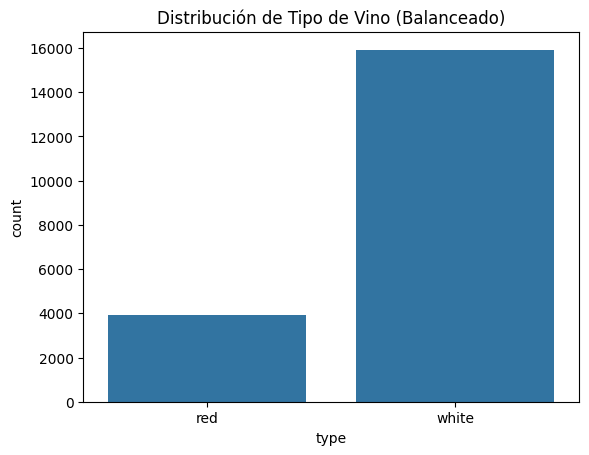

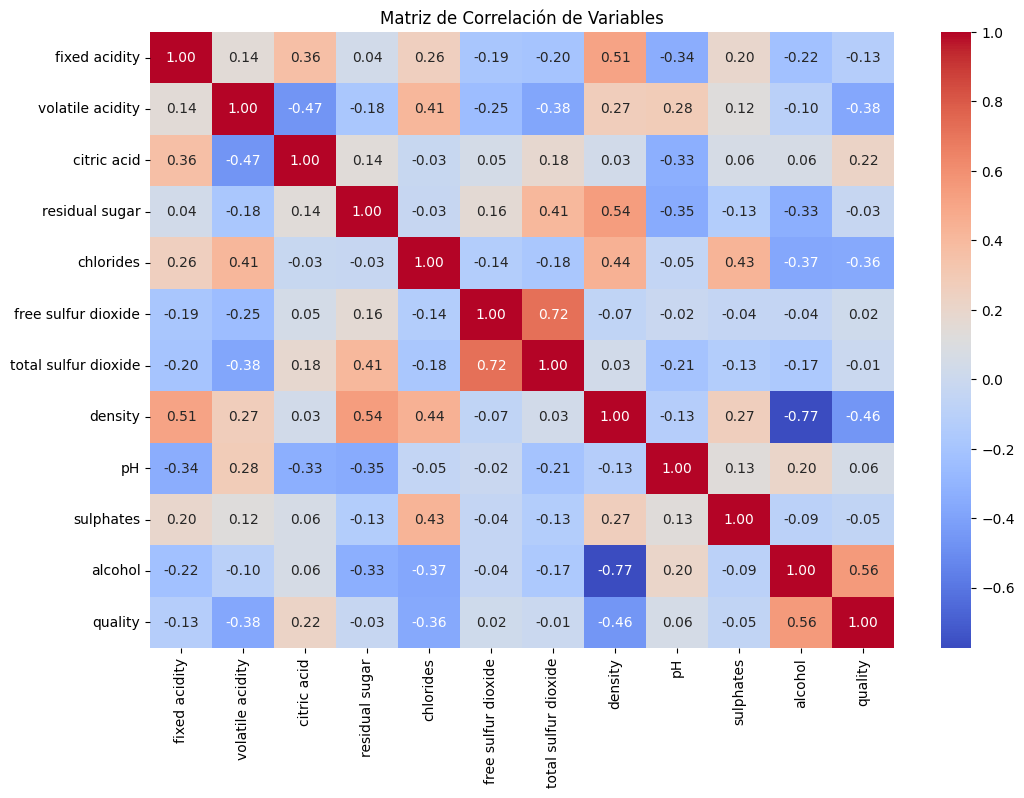

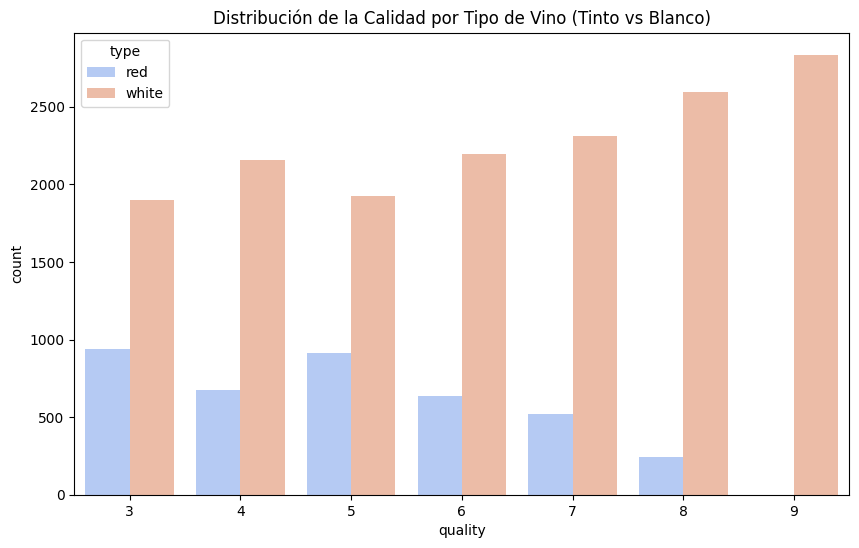

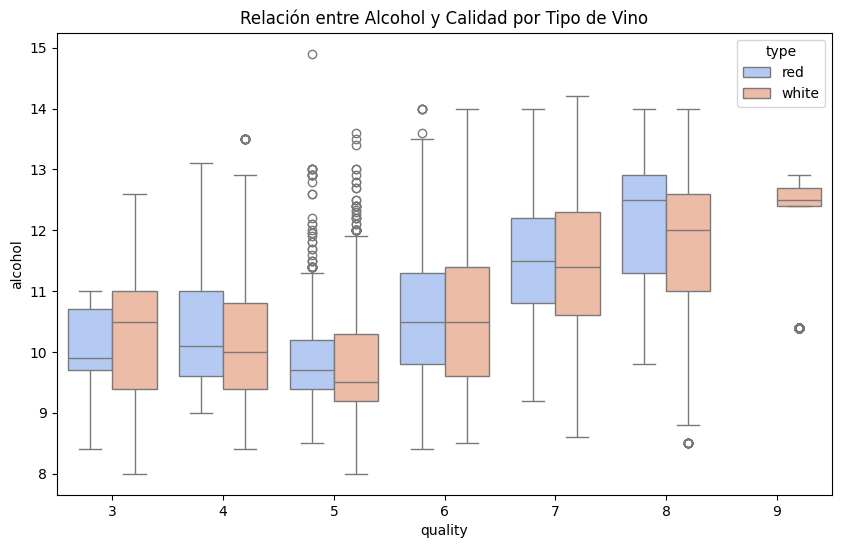

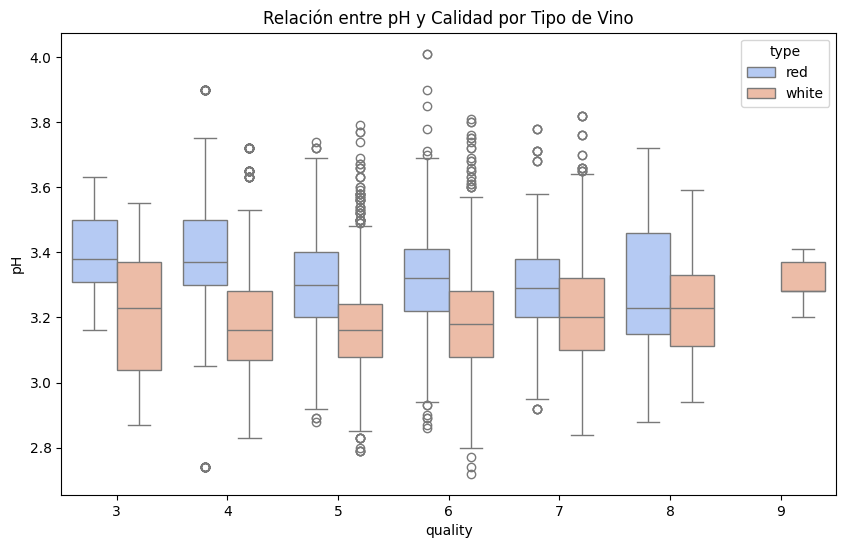

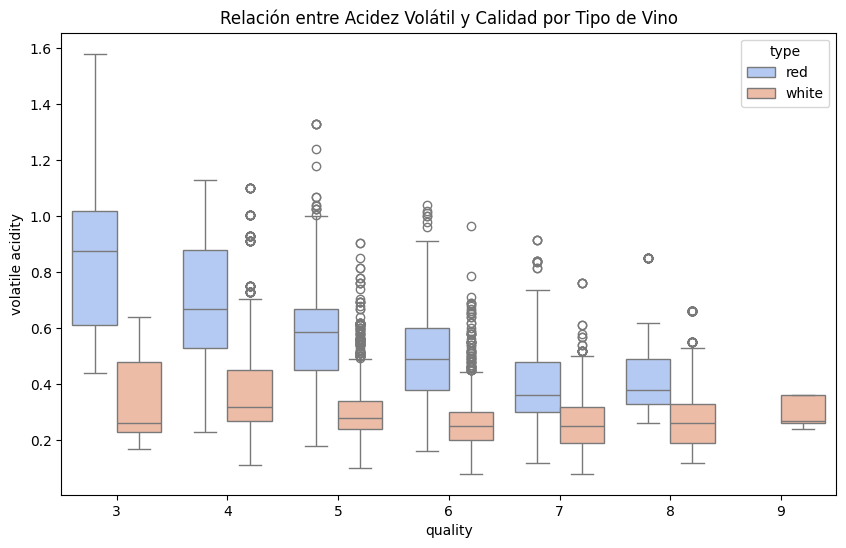

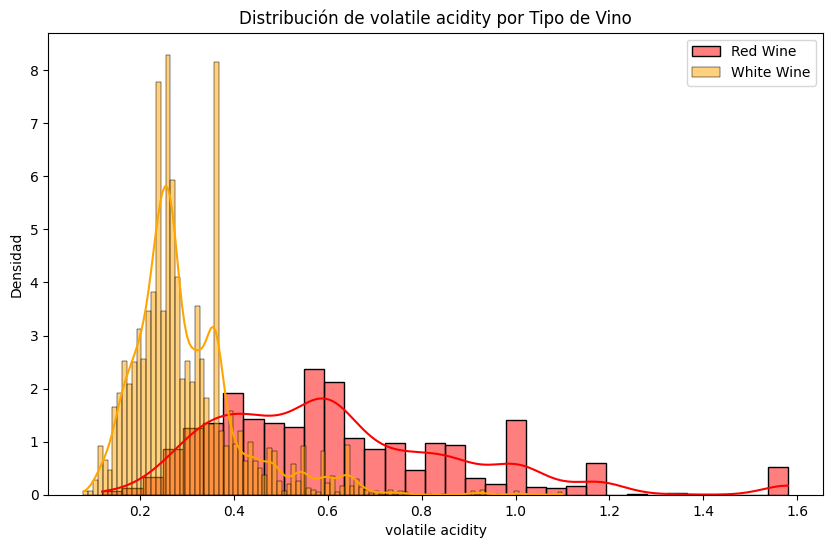

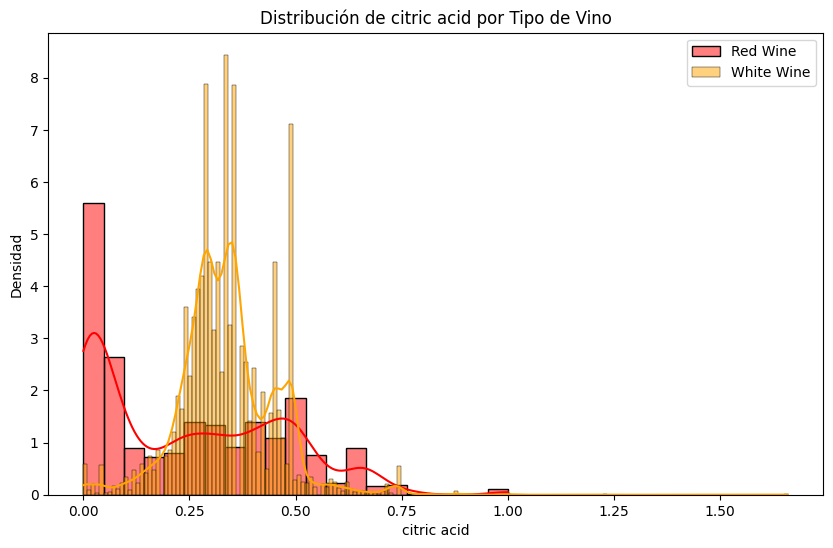

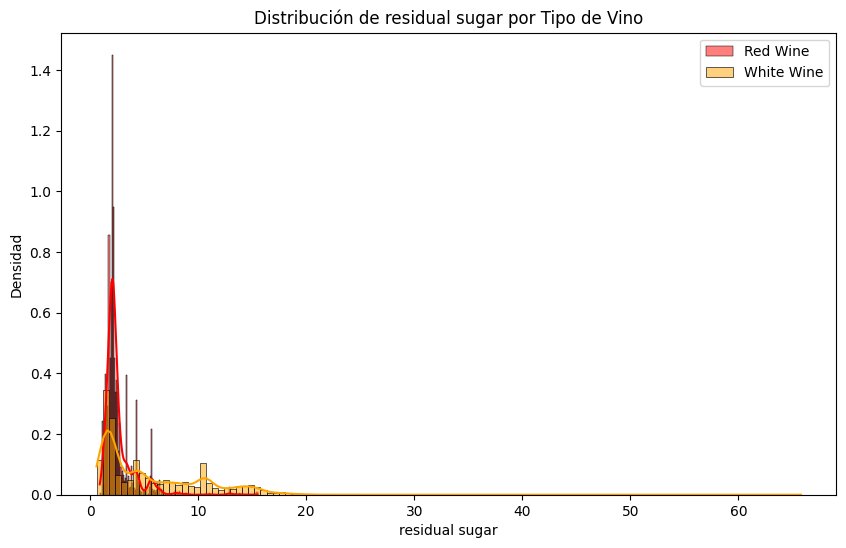

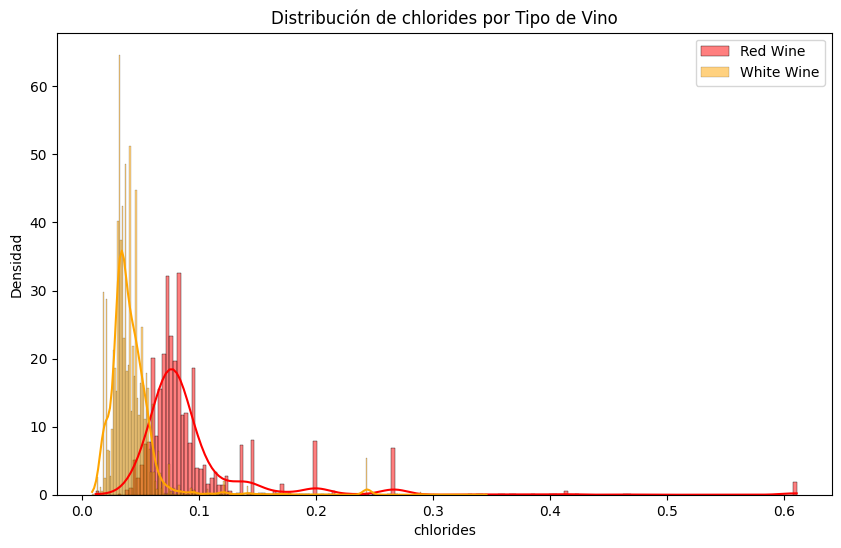

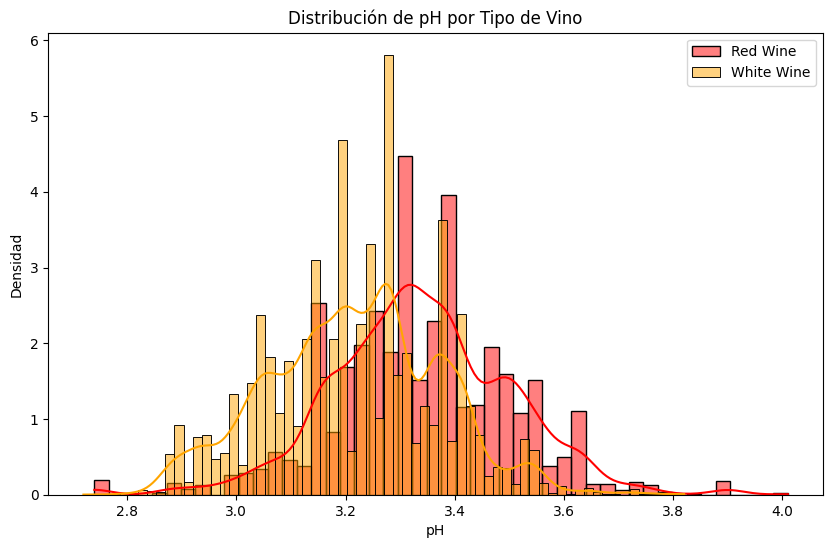

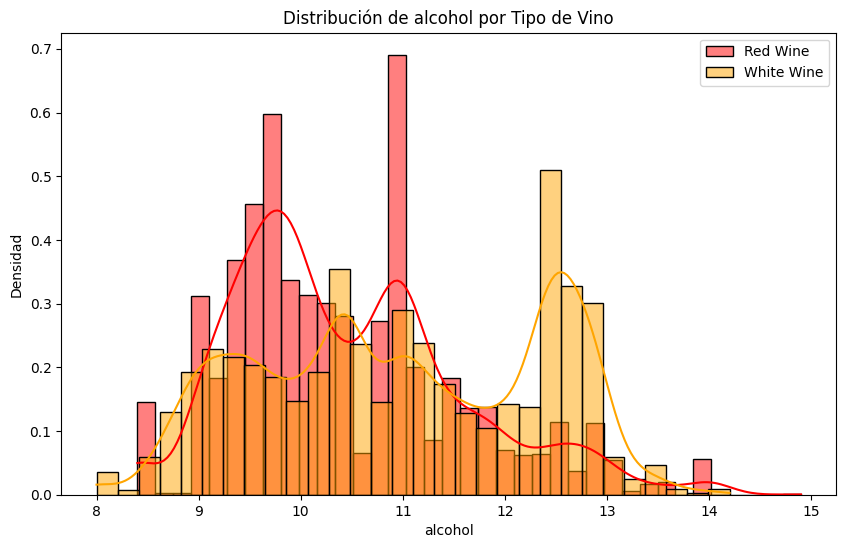

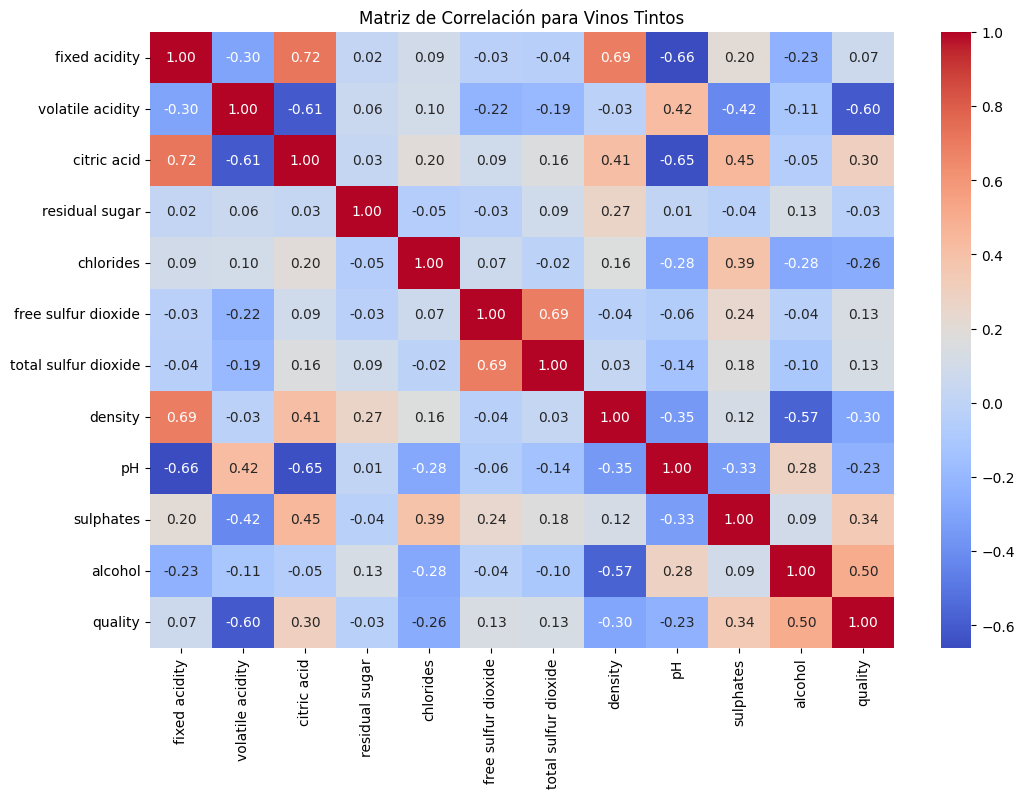

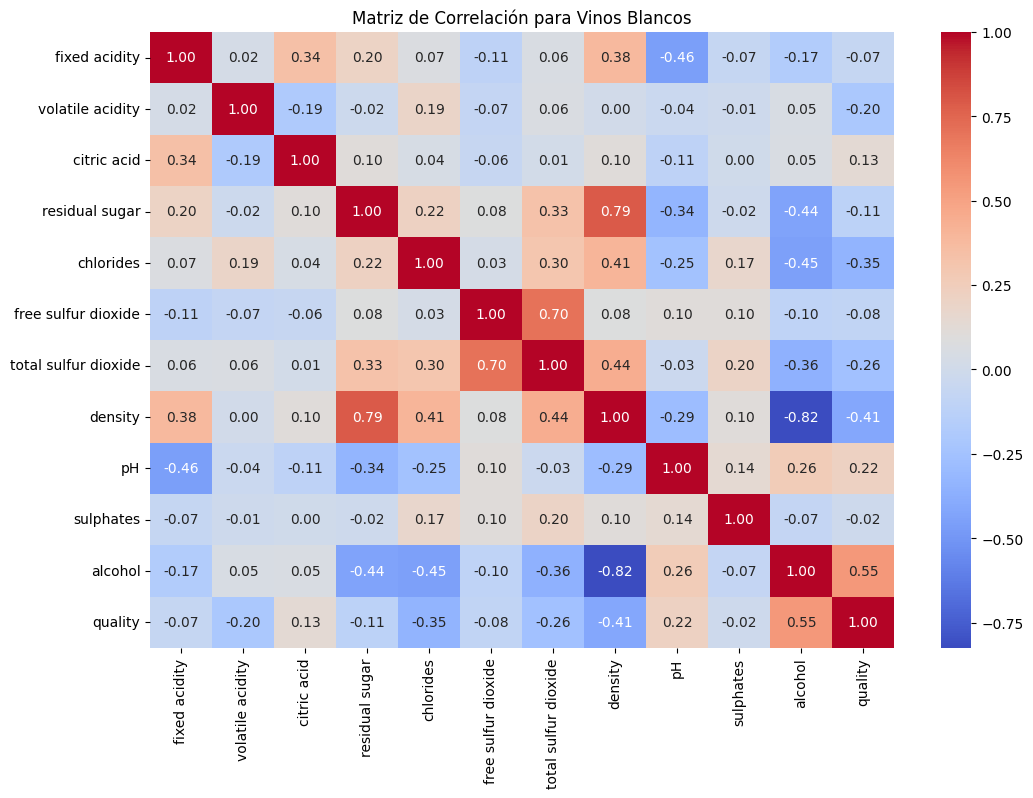

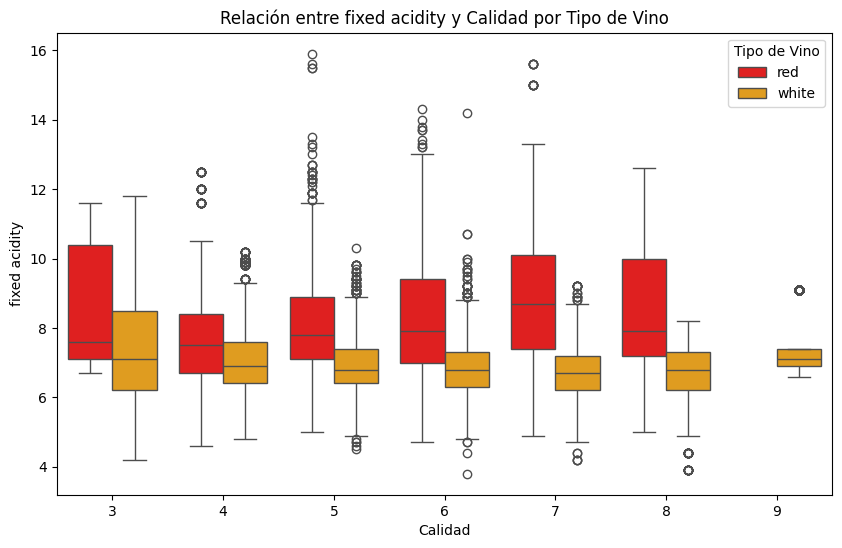

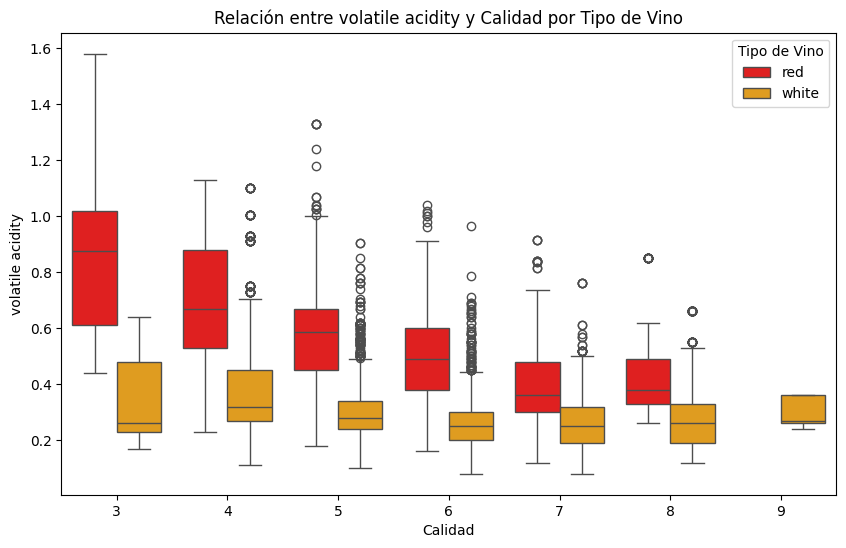

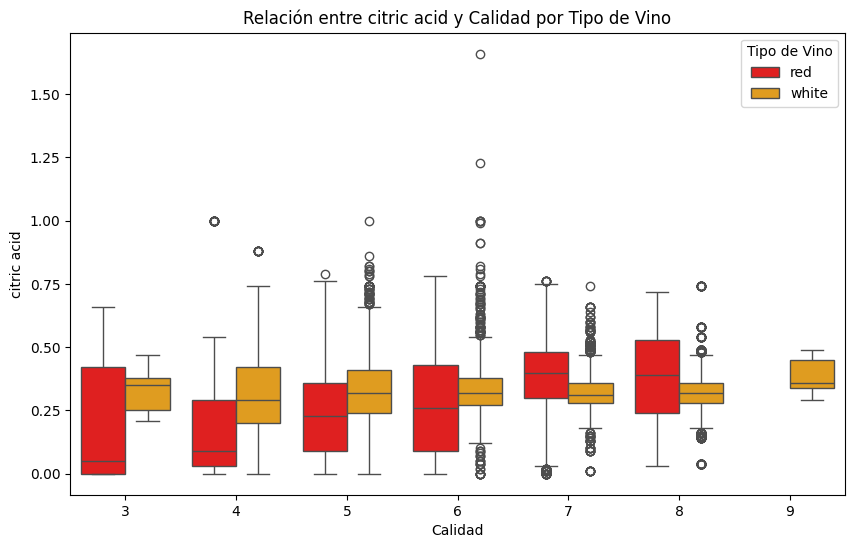

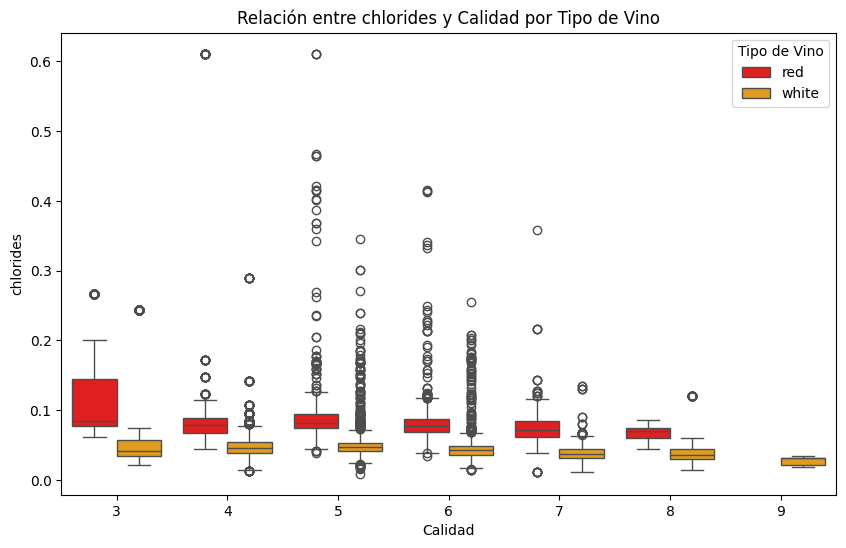

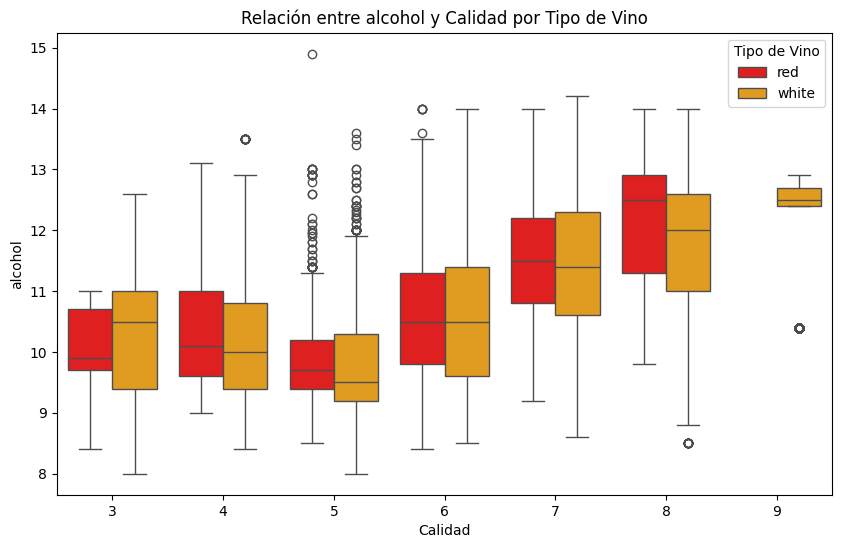

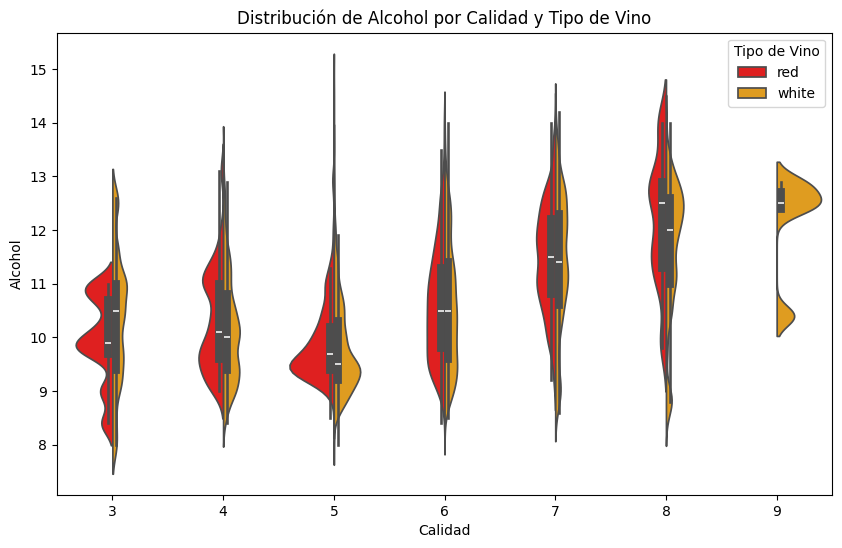

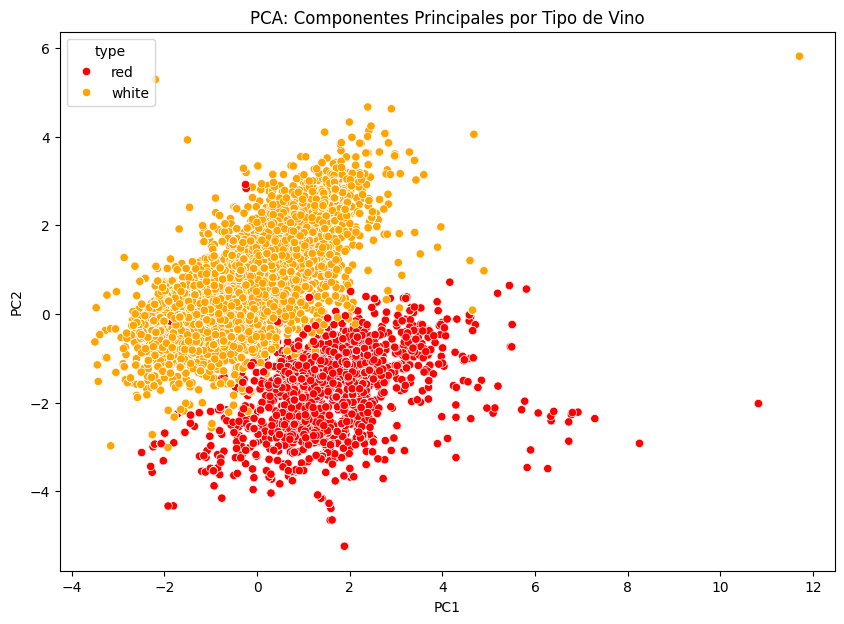

Varianza explicada por el primer componente: 0.25
Varianza explicada por el segundo componente: 0.23
                           PC1       PC2
fixed acidity         0.378862  0.009634
volatile acidity      0.219821 -0.405902
citric acid           0.053015  0.293401
residual sugar        0.214077  0.401009
chlorides             0.405313 -0.175820
free sulfur dioxide  -0.126921  0.366590
total sulfur dioxide -0.076046  0.502455
density               0.545215  0.101222
pH                   -0.161775 -0.335389
sulphates             0.240436 -0.154312
alcohol              -0.438283 -0.154766


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Paso 1: Cargar y combinar datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Agregar una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], axis=0)

# Resumen inicial de los datos
print(df_wine.info())
print(df_wine.describe())

# Paso 2: Balanceo de los datos usando RandomOverSampler para igualar la cantidad de cada clase en 'quality'
ros = RandomOverSampler(random_state=42)
X = df_wine.drop(columns=['quality'])  # Incluye 'type' en el balanceo
y = df_wine['quality']

X_resampled, y_resampled = ros.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_wine_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['quality'])], axis=1)

# Visualización de la distribución de la variable 'tipo de vino' después del balanceo
sns.countplot(x='type', data=df_wine_resampled)
plt.title('Distribución de Tipo de Vino (Balanceado)')
plt.show()

# Paso 3: Matriz de correlación de variables
plt.figure(figsize=(12, 8))
correlation_matrix = df_wine_resampled.drop(columns='type').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

# Paso 4: Análisis exploratorio

# Distribución de la calidad por tipo de vino
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=df_wine_resampled, palette='coolwarm')
plt.title('Distribución de la Calidad por Tipo de Vino (Tinto vs Blanco)')
plt.show()

# Relación entre alcohol y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', hue='type', data=df_wine_resampled, palette='coolwarm')
plt.title('Relación entre Alcohol y Calidad por Tipo de Vino')
plt.show()

# Relación entre pH y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', hue='type', data=df_wine_resampled, palette='coolwarm')
plt.title('Relación entre pH y Calidad por Tipo de Vino')
plt.show()

# Relación entre acidez volátil y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', hue='type', data=df_wine_resampled, palette='coolwarm')
plt.title('Relación entre Acidez Volátil y Calidad por Tipo de Vino')
plt.show()

# Paso 5: Análisis de la Distribución y Correlación por Tipo de Vino

# Separar los datasets por tipo de vino
df_red_wine = df_wine_resampled[df_wine_resampled['type'] == 'red'].drop(columns=['type'])
df_white_wine = df_wine_resampled[df_wine_resampled['type'] == 'white'].drop(columns=['type'])

# Distribuciones de las variables clave por tipo de vino
for col in ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'alcohol']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_red_wine, x=col, kde=True, color='red', label='Red Wine', stat='density')
    sns.histplot(data=df_white_wine, x=col, kde=True, color='orange', label='White Wine', stat='density')
    plt.title(f'Distribución de {col} por Tipo de Vino')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

# Matriz de Correlación por Tipo de Vino
plt.figure(figsize=(12, 8))
sns.heatmap(df_red_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Vinos Tintos')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df_white_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Vinos Blancos')
plt.show()

# Paso 6: Comparación de las Relaciones entre Variables Clave y la Calidad del Vino

# Variables relevantes a analizar
variables_clave = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'alcohol']

# Gráficos de comparación por tipo de vino para las variables seleccionadas
for col in variables_clave:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality', y=col, hue='type', data=df_wine_resampled, palette=['red', 'orange'])
    plt.title(f'Relación entre {col} y Calidad por Tipo de Vino')
    plt.xlabel('Calidad')
    plt.ylabel(col)
    plt.legend(title='Tipo de Vino')
    plt.show()

# Visualización adicional: Comparación de la distribución de alcohol por tipo de vino y calidad
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', hue='type', data=df_wine_resampled, split=True, palette=['red', 'orange'])
plt.title('Distribución de Alcohol por Calidad y Tipo de Vino')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.legend(title='Tipo de Vino')
plt.show()

# Paso 7: PCA con los datos escalados

# Escalar los datos antes de realizar el PCA
features = df_wine_resampled.drop(columns=['type', 'quality'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['type'] = df_wine_resampled['type'].values

# Visualizar los componentes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='type', data=pca_df, palette={'red': 'red', 'white': 'orange'})
plt.title('PCA: Componentes Principales por Tipo de Vino')
plt.show()

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]:.2f}')

# Paso 8: Cálculo de las cargas de las características originales en los componentes principales

# Obtener las cargas de las características originales en los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features.columns)
print(loadings)


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None
       fixed acidity  volatile acidity  citric acid  residual s

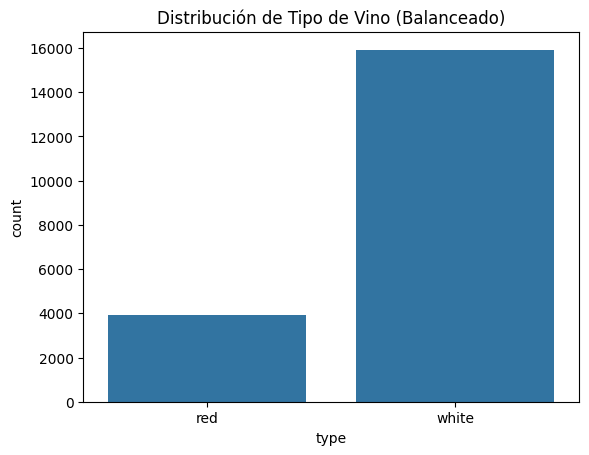

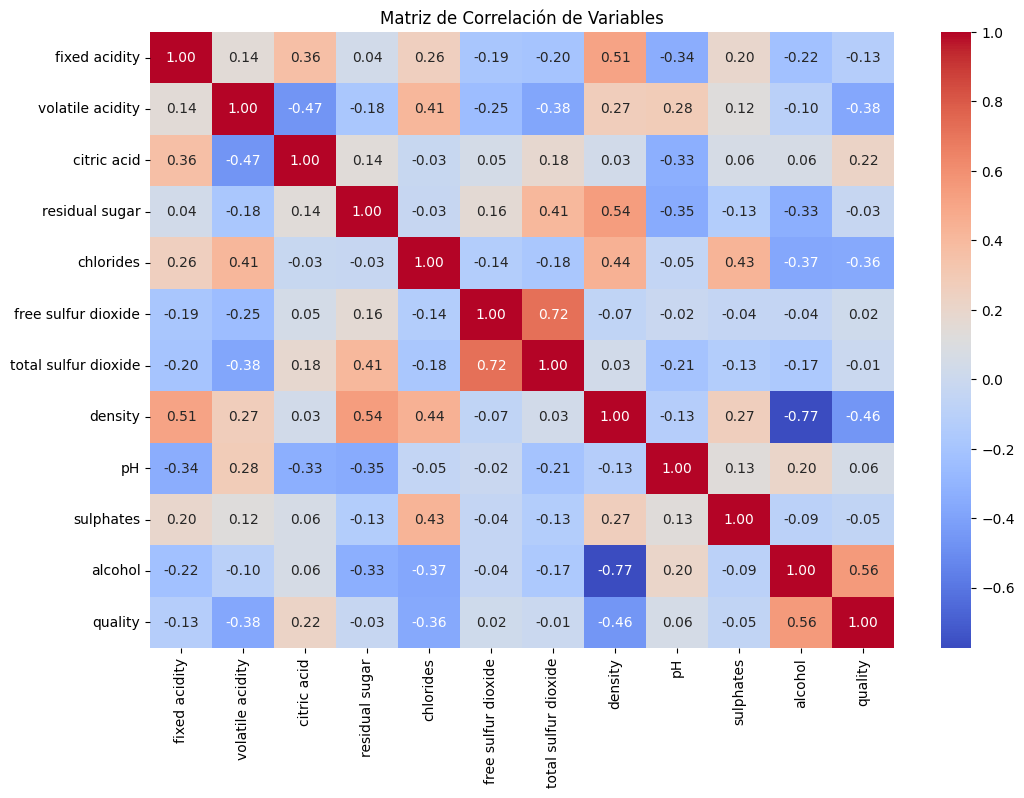

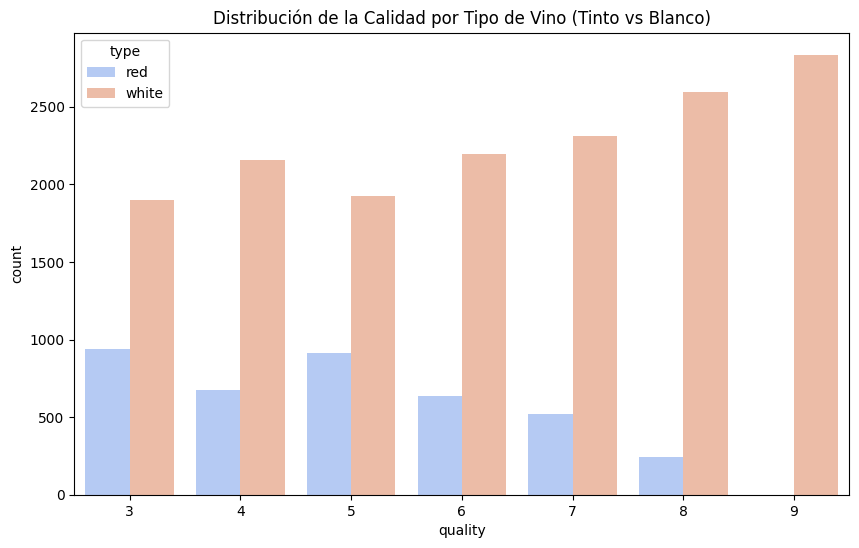

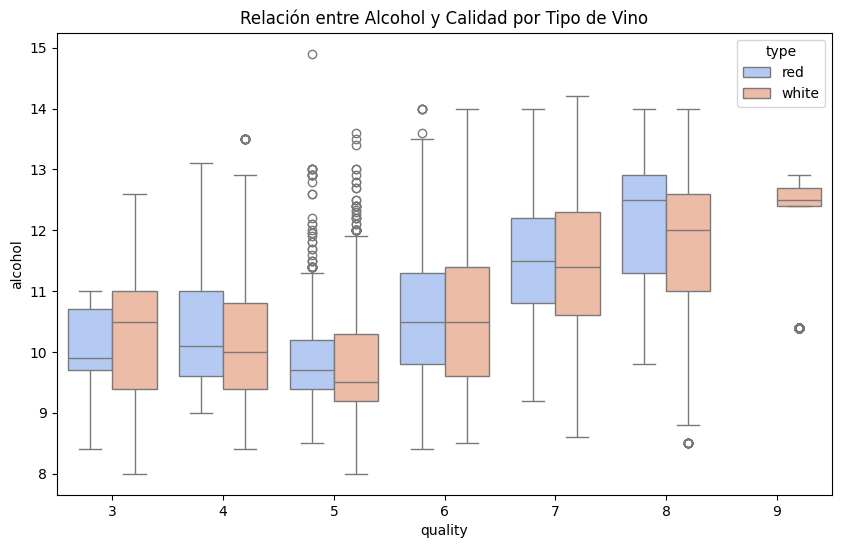

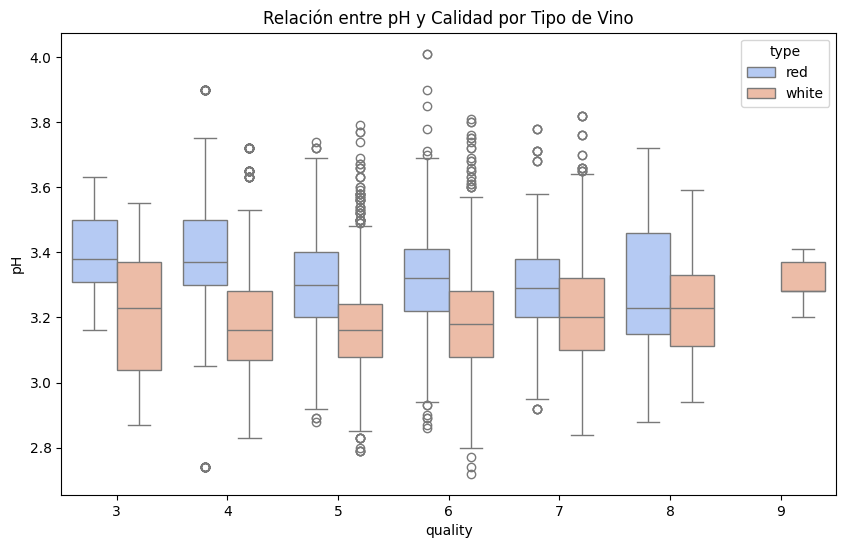

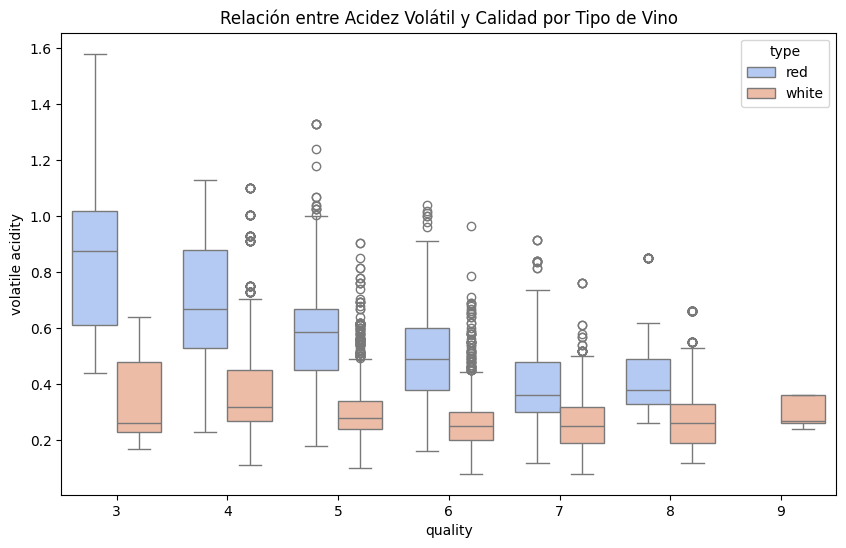

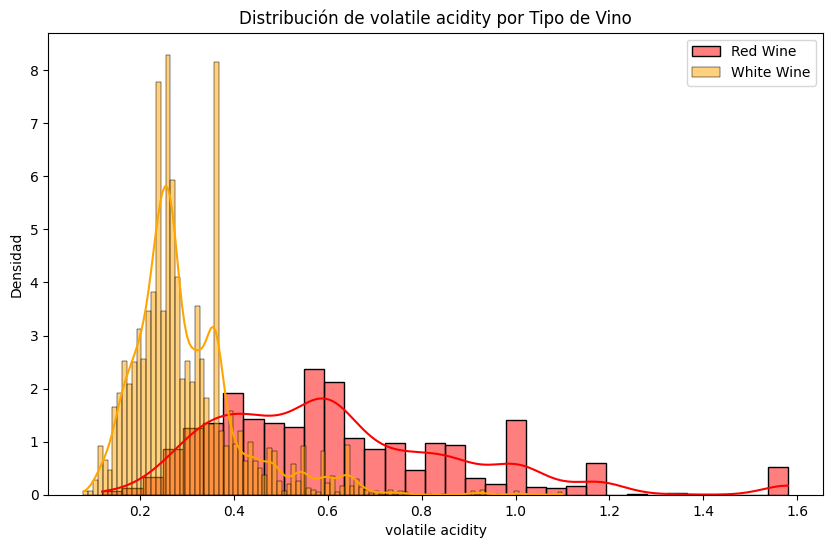

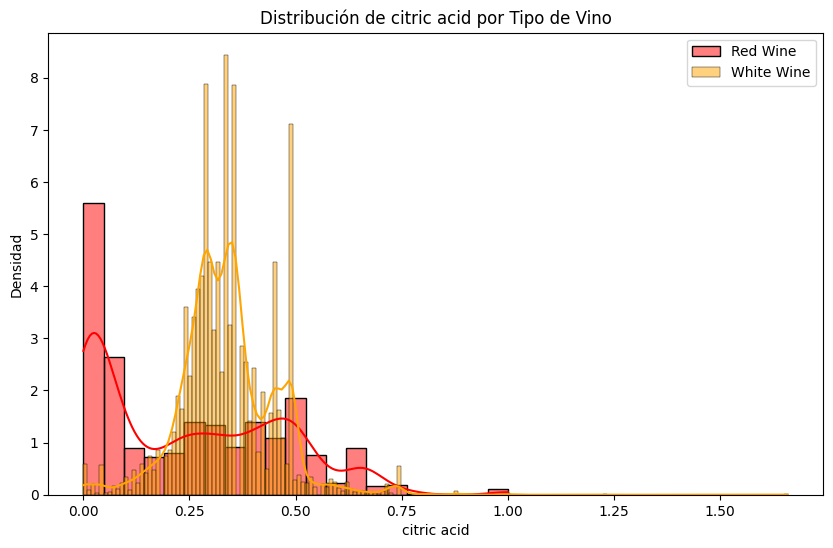

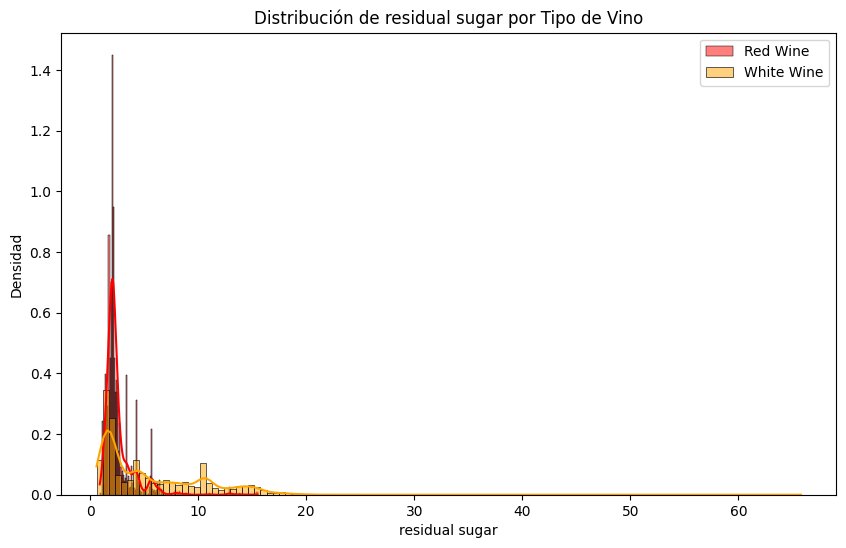

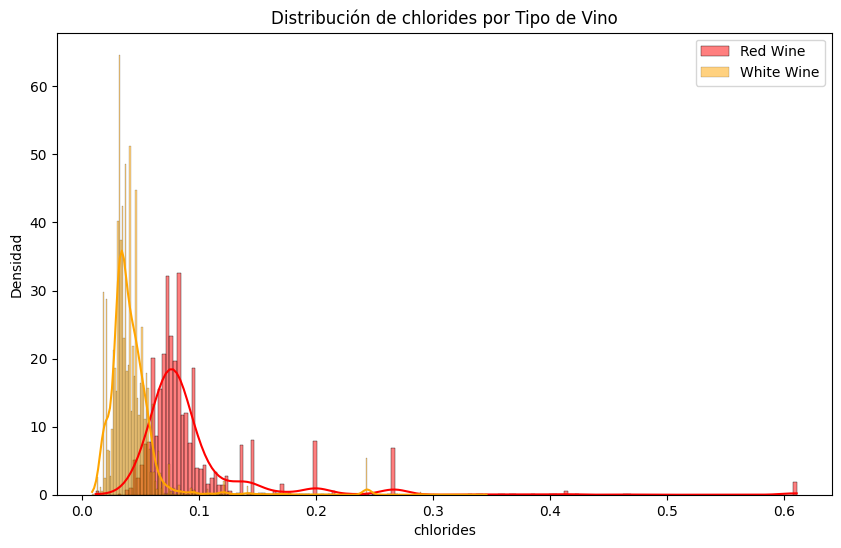

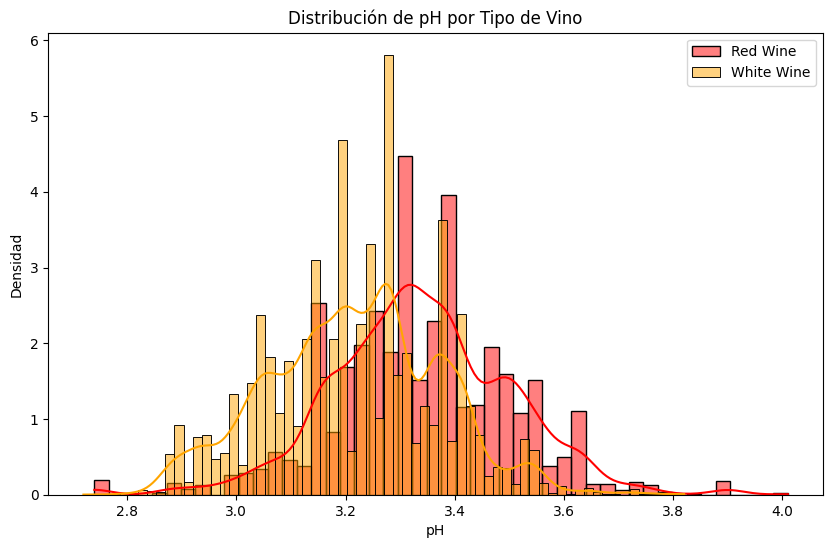

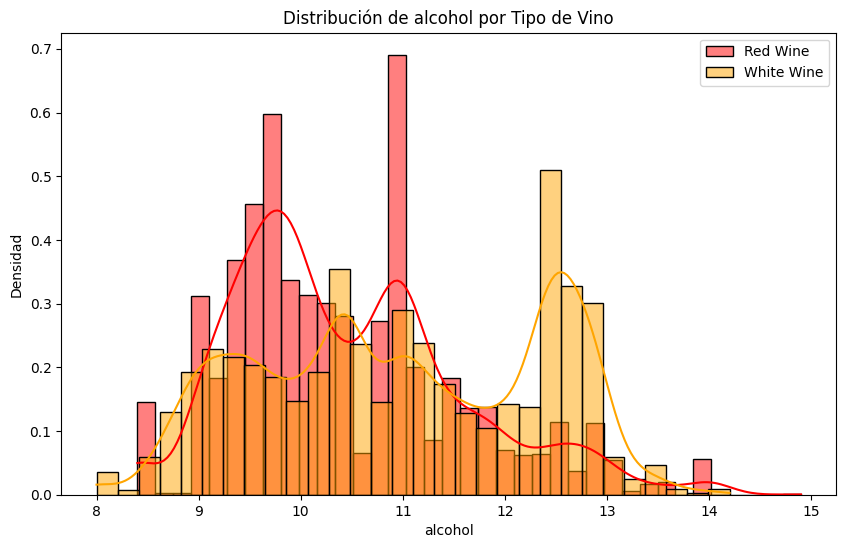

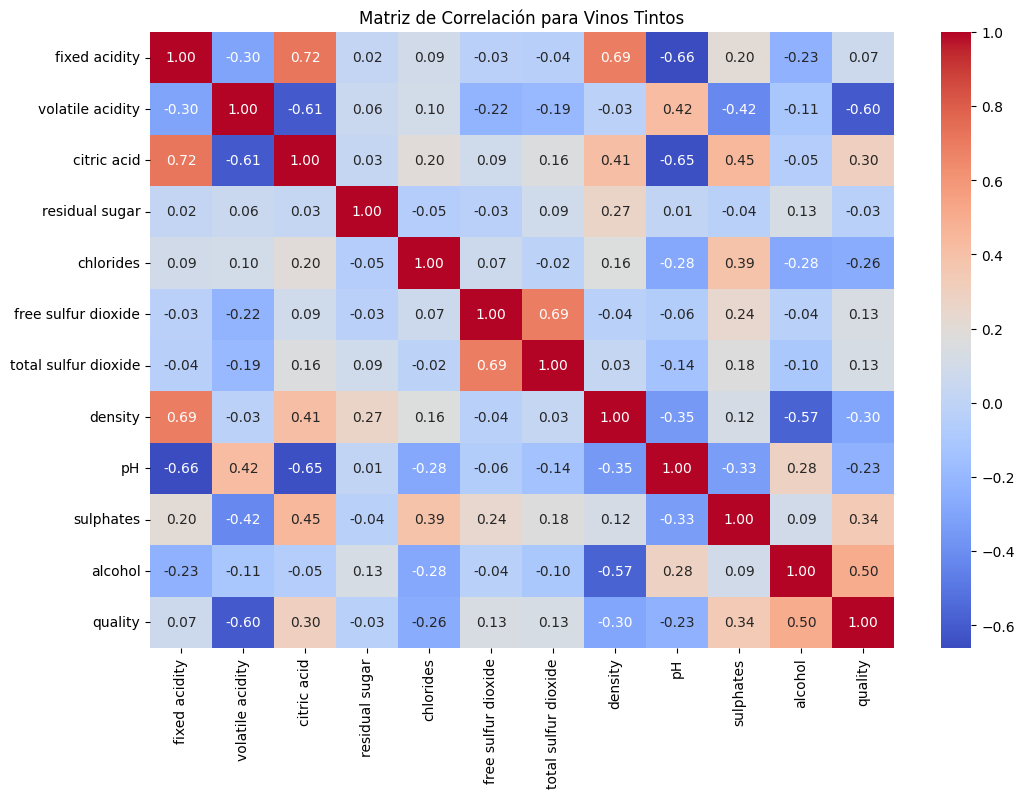

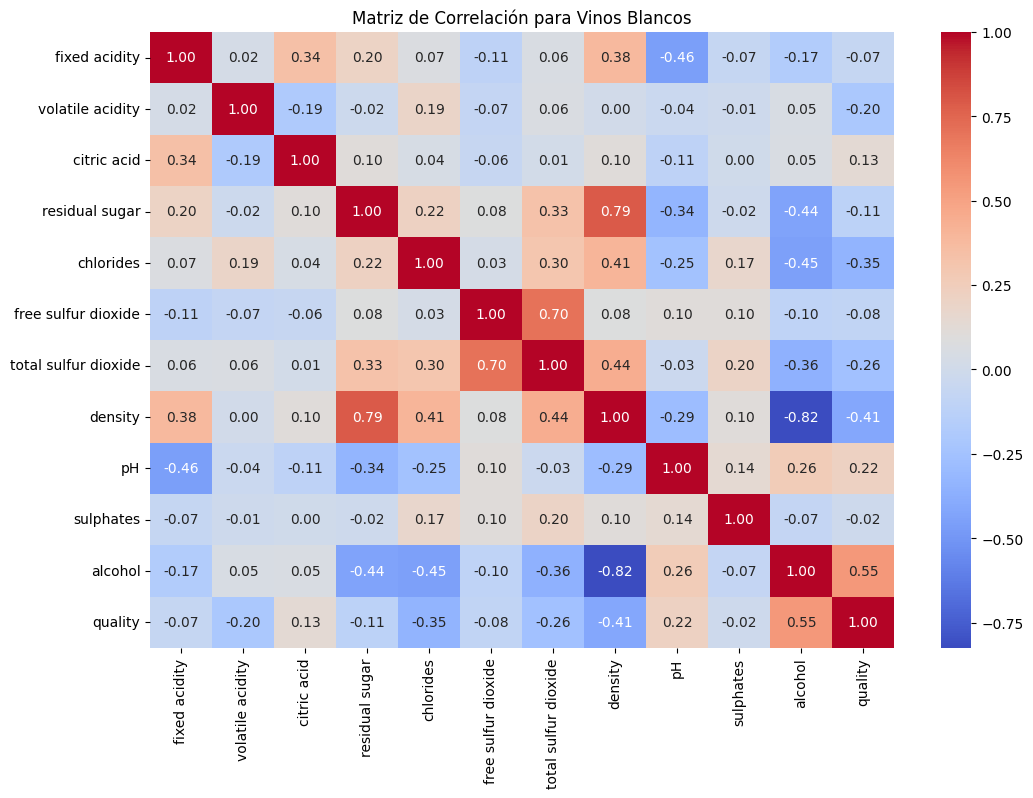

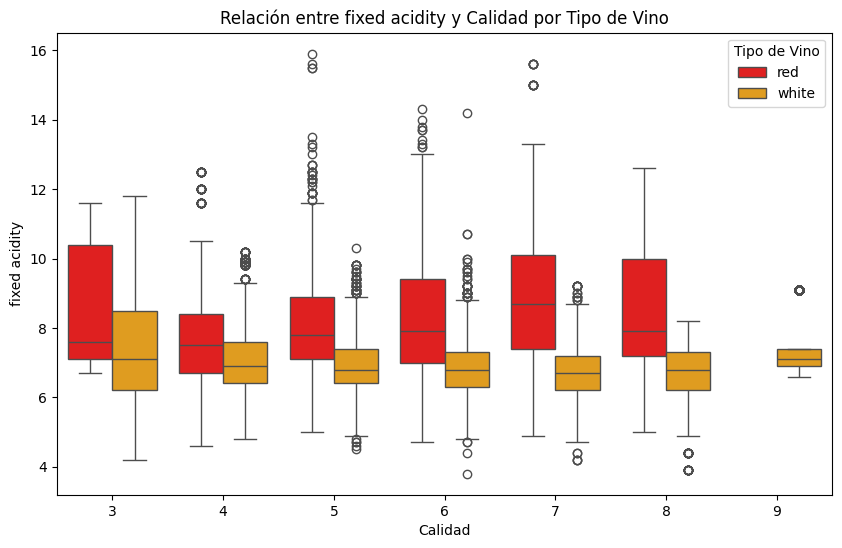

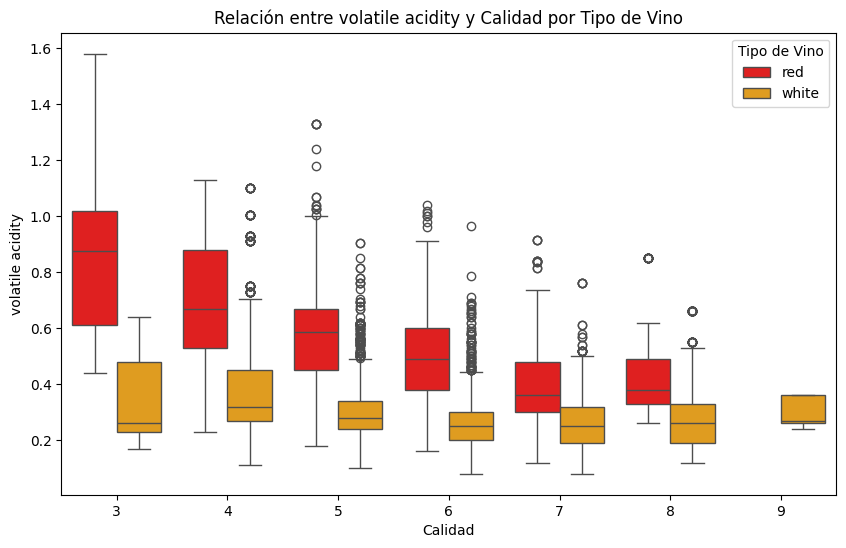

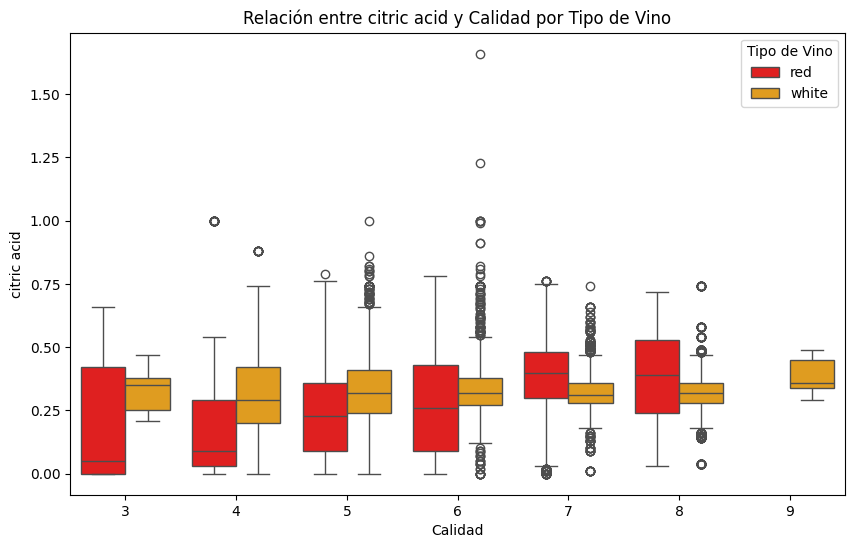

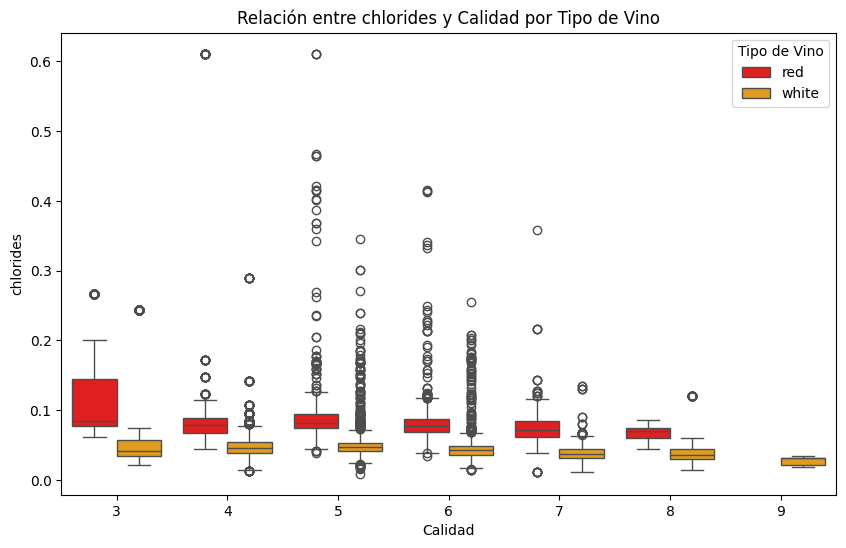

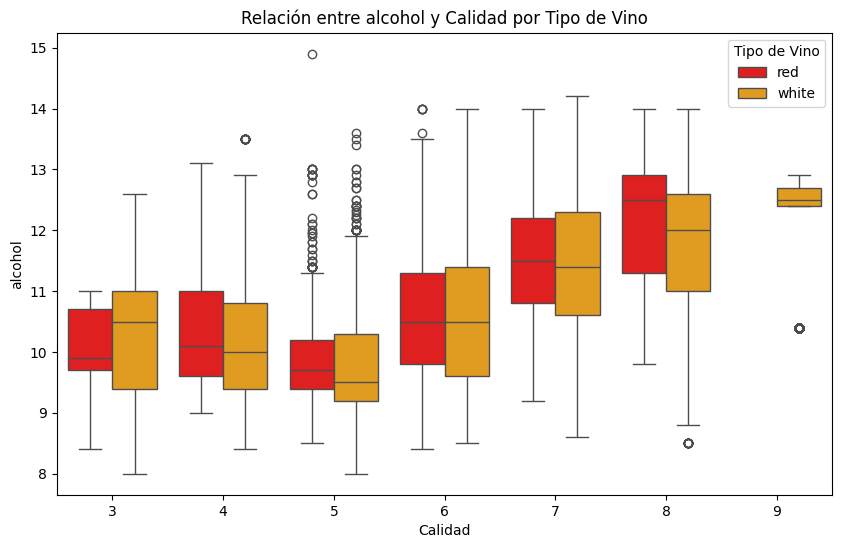

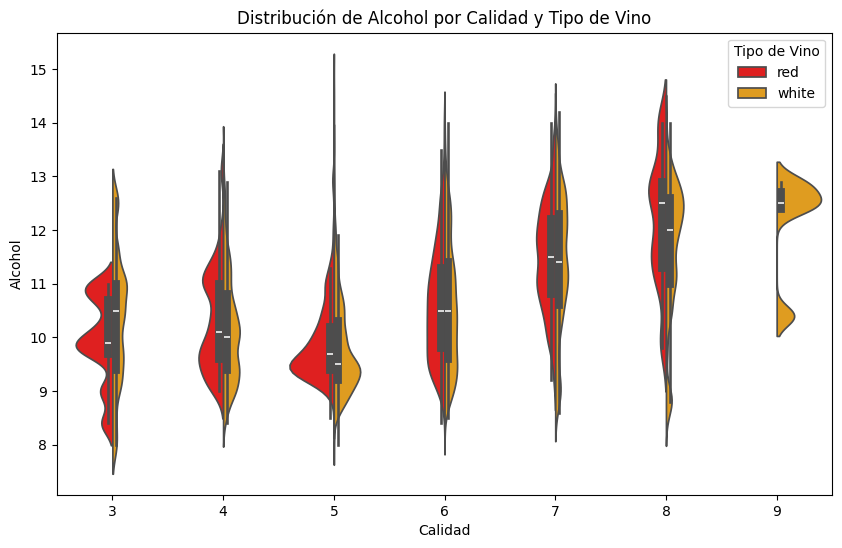

Varianza explicada por el primer componente: 0.25
Varianza explicada por el segundo componente: 0.23
Cargas de las características en los componentes principales:
                           PC1       PC2       PC3       PC4       PC5
fixed acidity         0.378862  0.009634  0.425884  0.027090 -0.294929
volatile acidity      0.219821 -0.405902 -0.266237 -0.120120 -0.392750
citric acid           0.053015  0.293401  0.542820  0.268246  0.130034
residual sugar        0.214077  0.401009 -0.150547 -0.315946  0.373387
chlorides             0.405313 -0.175820 -0.075276  0.293924 -0.257747
free sulfur dioxide  -0.126921  0.366590 -0.358683  0.402384 -0.367675
total sulfur dioxide -0.076046  0.502455 -0.293741  0.213687 -0.163017
density               0.545215  0.101222 -0.153798 -0.098075  0.216880
pH                   -0.161775 -0.335389 -0.342345  0.213127  0.446609
sulphates             0.240436 -0.154312  0.026084  0.669443  0.352499
alcohol              -0.438283 -0.154766  0.261313  0.12

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Paso 1: Cargar y combinar datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Agregar una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], axis=0)

# Resumen inicial de los datos
print(df_wine.info())
print(df_wine.describe())

# Paso 2: Balanceo de los datos usando RandomOverSampler para igualar la cantidad de cada clase en 'quality'
ros = RandomOverSampler(random_state=42)
X = df_wine.drop(columns=['quality'])  # Incluye 'type' en el balanceo
y = df_wine['quality']

X_resampled, y_resampled = ros.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_wine_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['quality'])], axis=1)

# Visualización de la distribución de la variable 'tipo de vino' después del balanceo
sns.countplot(x='type', data=df_wine_resampled)
plt.title('Distribución de Tipo de Vino (Balanceado)')
plt.show()

# Paso 3: Matriz de correlación de variables
plt.figure(figsize=(12, 8))
correlation_matrix = df_wine_resampled.drop(columns='type').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

# Paso 4: Análisis exploratorio

# Distribución de la calidad por tipo de vino
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=df_wine_resampled, palette='coolwarm')
plt.title('Distribución de la Calidad por Tipo de Vino (Tinto vs Blanco)')
plt.show()

# Relación entre alcohol y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', hue='type', data=df_wine_resampled, palette='coolwarm')
plt.title('Relación entre Alcohol y Calidad por Tipo de Vino')
plt.show()

# Relación entre pH y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', hue='type', data=df_wine_resampled, palette='coolwarm')
plt.title('Relación entre pH y Calidad por Tipo de Vino')
plt.show()

# Relación entre acidez volátil y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', hue='type', data=df_wine_resampled, palette='coolwarm')
plt.title('Relación entre Acidez Volátil y Calidad por Tipo de Vino')
plt.show()

# Paso 5: Análisis de la Distribución y Correlación por Tipo de Vino

# Separar los datasets por tipo de vino
df_red_wine = df_wine_resampled[df_wine_resampled['type'] == 'red'].drop(columns=['type'])
df_white_wine = df_wine_resampled[df_wine_resampled['type'] == 'white'].drop(columns=['type'])

# Distribuciones de las variables clave por tipo de vino
for col in ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'alcohol']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_red_wine, x=col, kde=True, color='red', label='Red Wine', stat='density')
    sns.histplot(data=df_white_wine, x=col, kde=True, color='orange', label='White Wine', stat='density')
    plt.title(f'Distribución de {col} por Tipo de Vino')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

# Matriz de Correlación por Tipo de Vino
plt.figure(figsize=(12, 8))
sns.heatmap(df_red_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Vinos Tintos')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df_white_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Vinos Blancos')
plt.show()

# Paso 6: Comparación de las Relaciones entre Variables Clave y la Calidad del Vino

# Variables relevantes a analizar
variables_clave = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'alcohol']

# Gráficos de comparación por tipo de vino para las variables seleccionadas
for col in variables_clave:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality', y=col, hue='type', data=df_wine_resampled, palette=['red', 'orange'])
    plt.title(f'Relación entre {col} y Calidad por Tipo de Vino')
    plt.xlabel('Calidad')
    plt.ylabel(col)
    plt.legend(title='Tipo de Vino')
    plt.show()

# Visualización adicional: Comparación de la distribución de alcohol por tipo de vino y calidad
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', hue='type', data=df_wine_resampled, split=True, palette=['red', 'orange'])
plt.title('Distribución de Alcohol por Calidad y Tipo de Vino')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.legend(title='Tipo de Vino')
plt.show()

# Paso 7: PCA con los datos escalados

# Escalar los datos antes de realizar el PCA
features = df_wine_resampled.drop(columns=['type', 'quality'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=5)  # Ajustamos para 5 componentes principales
pca_components = pca.fit_transform(scaled_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['type'] = df_wine_resampled['type'].values

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]:.2f}')

# Cálculo de las cargas de las características originales en los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=features.columns)
print("Cargas de las características en los componentes principales:")
print(loadings)

# Selección de características clave para los modelos
selected_features = loadings.abs().sum(axis=1).nlargest(5).index.tolist()
print(f"Variables seleccionadas para los modelos: {selected_features}")

# Paso 8: Entrenamiento de Modelos de Clasificación

# Dividir los datos balanceados y escalados en entrenamiento y prueba
X_model = df_wine_resampled[selected_features]
y_model = df_wine_resampled['quality']
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42)

# Entrenamiento con Regresión Logística
logreg_model = LogisticRegression(max_iter=2000, random_state=42)  # Incrementamos el número de iteraciones
logreg_model.fit(X_train, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_logreg = logreg_model.predict(X_test)
print("Evaluación del modelo de Regresión Logística para predicción de la calidad del vino")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Entrenamiento con Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación del modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Evaluación del modelo de Random Forest para predicción de la calidad del vino")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



# Paso 9: Entrenamiento de los modelos para predecir el tipo de vino
X_model_type = df_wine_resampled[variables_seleccionadas]
y_model_type = df_wine_resampled['type']

# Dividir el dataset en entrenamiento y prueba
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_model_type, y_model_type, test_size=0.3, random_state=42)

# Modelo de Regresión Logística para predecir el tipo de vino
